In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from scipy.stats import pearsonr

! pip install nltk
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
cps_summary = pd.DataFrame()
cps_summary = pd.read_csv("csv's/CPS_Summary.csv")

bpcps_summary = pd.DataFrame()
bpcps_summary = pd.read_csv("csv's/BPCPS_Summary.csv")

ppcps_summary = pd.DataFrame()
ppcps_summary = pd.read_csv("csv's/PPCPS_Summary.csv")

ppbps_summary = pd.DataFrame()
ppbps_summary = pd.read_csv("csv's/PPBPS_Summary.csv")


final_predictions = pd.DataFrame()
final_predictions = pd.read_csv("csv's/finalPredictions.csv")

totalRatio = pd.DataFrame()
totalRatio = pd.read_csv("csv's/TotalRatio.csv")

# Using CPS

## Top 5 categories by maximum CPS value

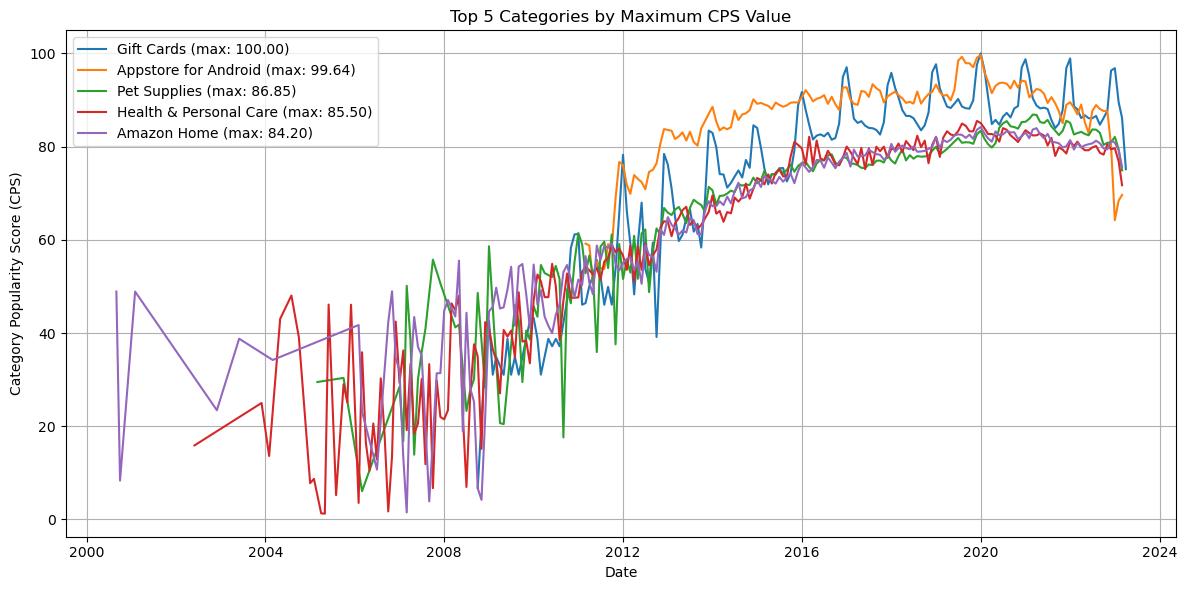

In [43]:
max_cps_by_category = cps_summary.groupby('category')['CPS scaled'].max().sort_values(ascending=False)
top_categories = max_cps_by_category.head(5).index.tolist()

plt.figure(figsize=(12, 6))
for category in top_categories:
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    plt.plot(category_subset['date'], category_subset['CPS scaled'], label=f"{category} (max: {max_cps_by_category[category]:.2f})")

plt.xlabel('Date')
plt.ylabel('Category Popularity Score (CPS)')
plt.title('Top 5 Categories by Maximum CPS Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

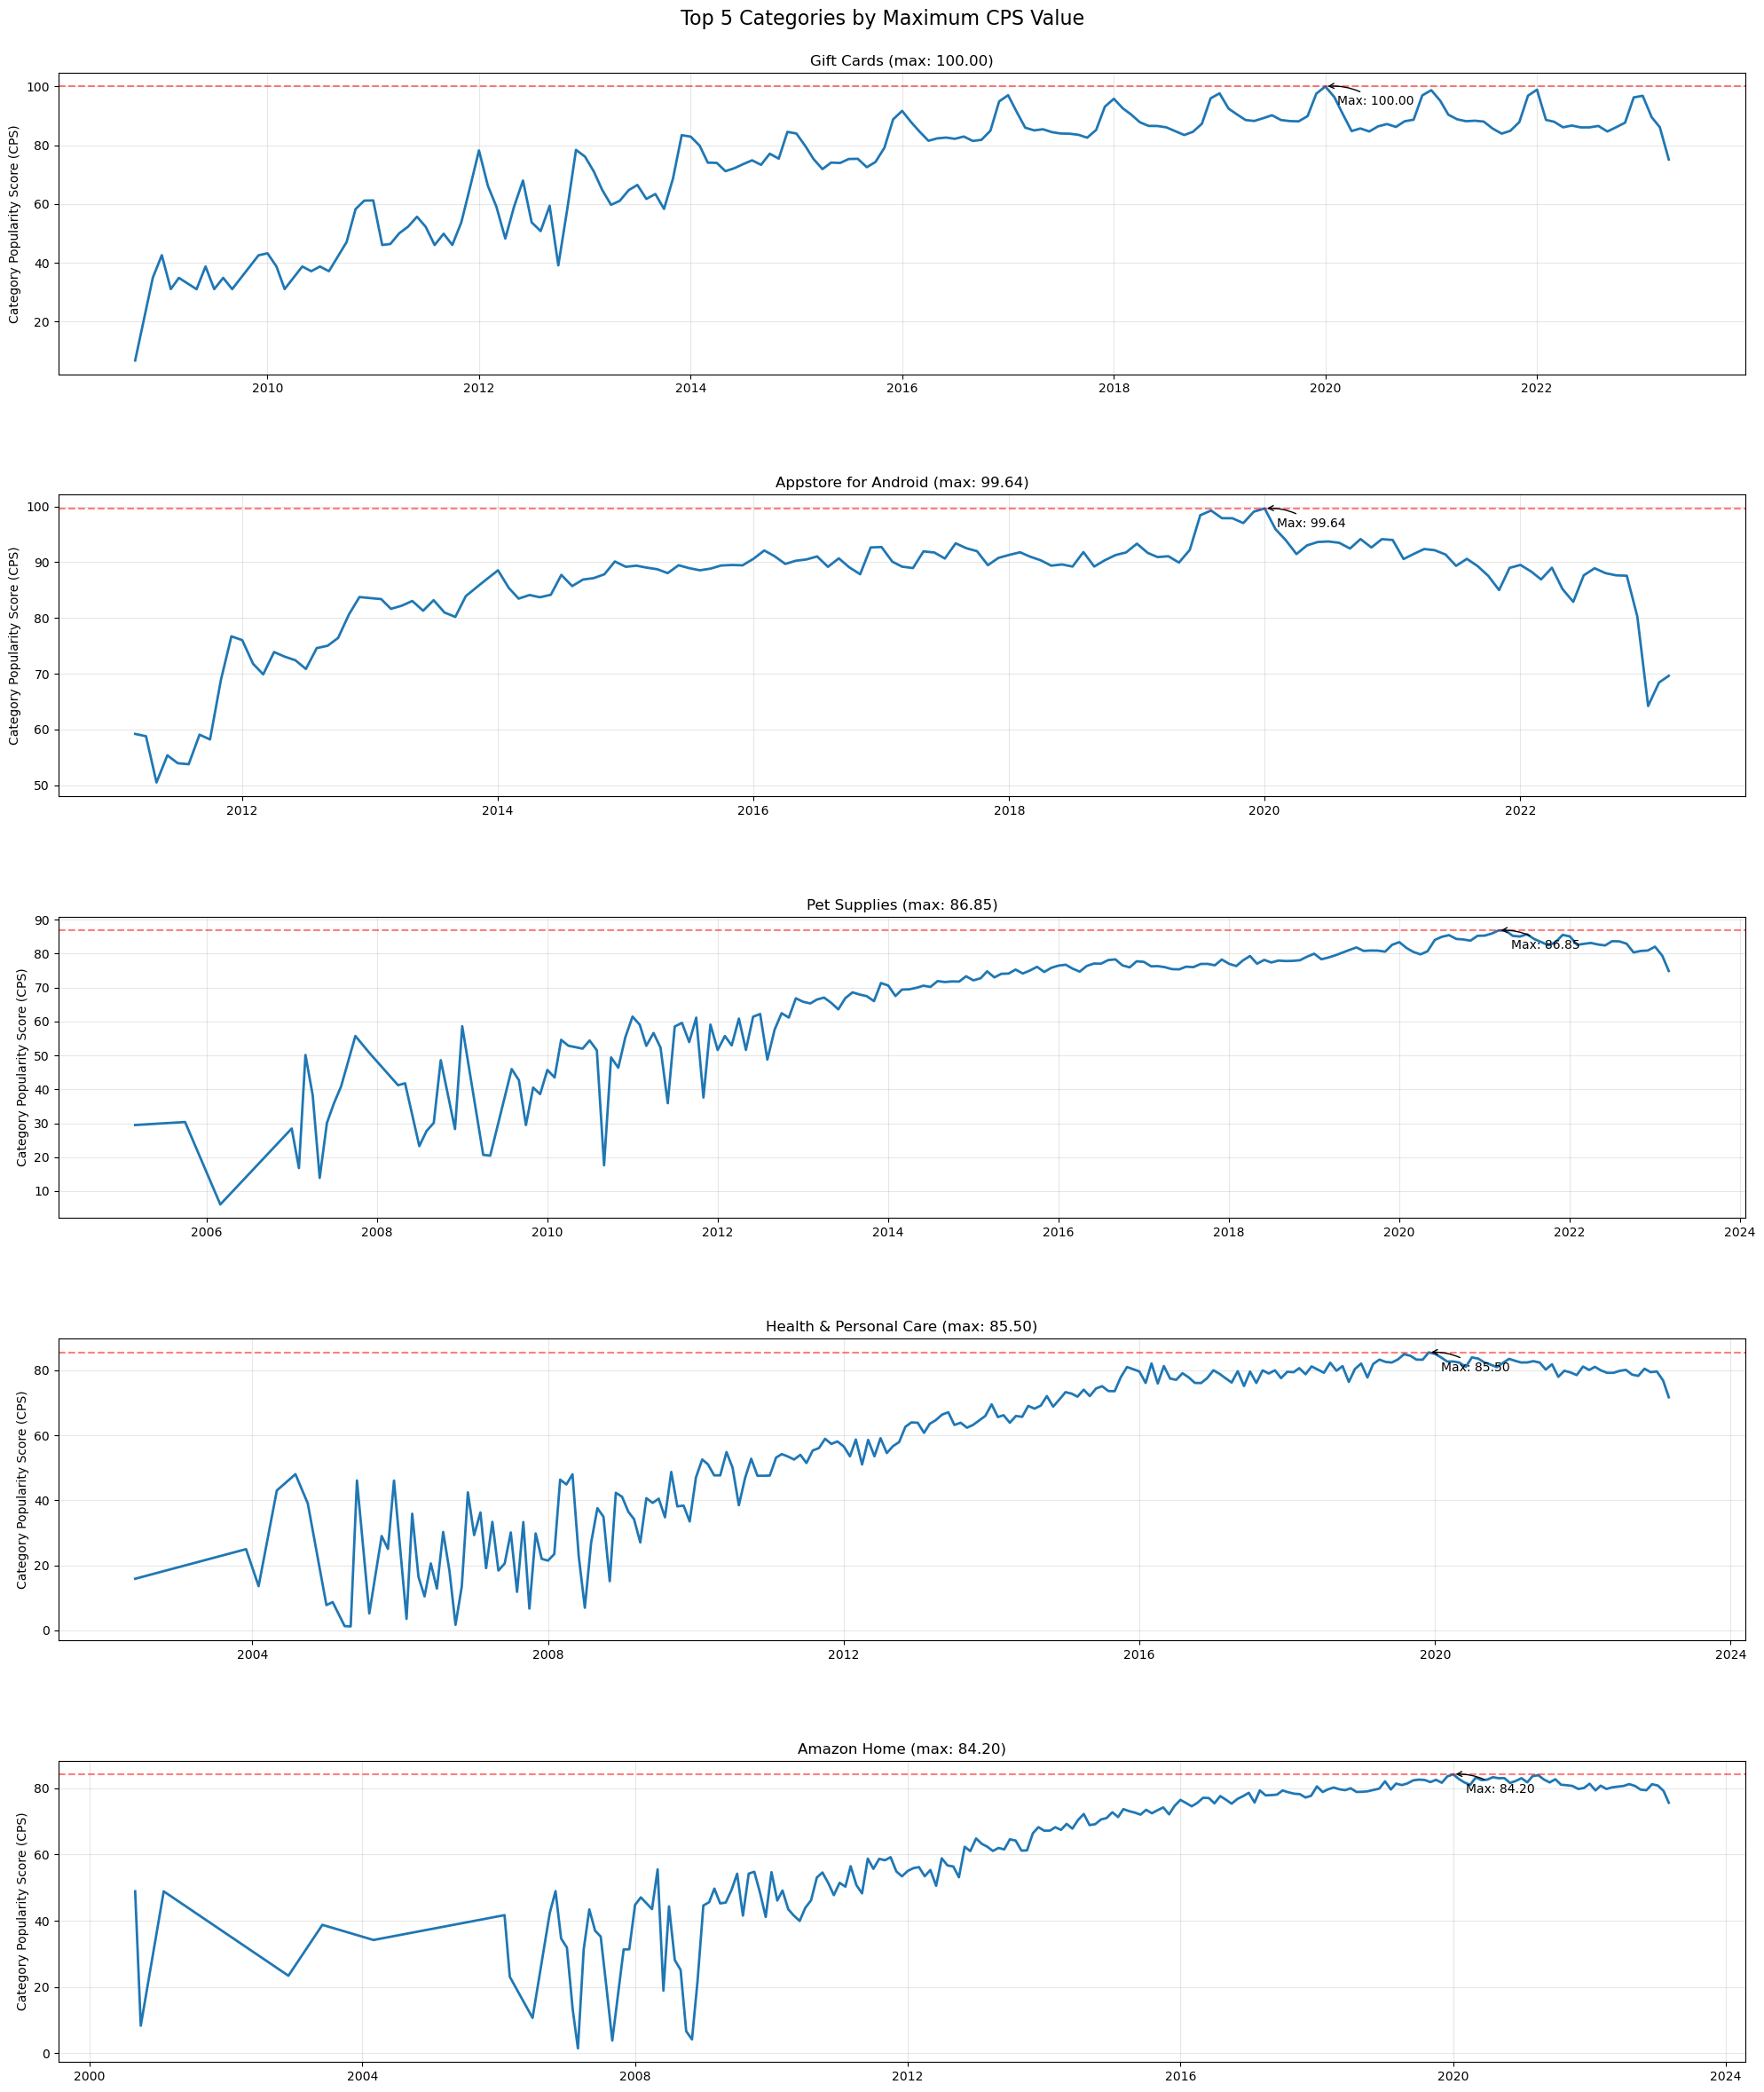

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get the top 5 categories by maximum CPS value
max_cps_by_category = cps_summary.groupby('category')['CPS scaled'].max().sort_values(ascending=False)
top_categories = max_cps_by_category.head(5).index.tolist()

# Create a figure with 5 subplots (one for each category)
fig, axes = plt.subplots(5, 1, figsize=(20, 24), sharex=False)
fig.suptitle('Top 5 Categories by Maximum CPS Value', fontsize=16)

# Plot each category in its own subplot
for i, category in enumerate(top_categories):
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    
    axes[i].plot(category_subset['date'], category_subset['CPS scaled'], 
                 linestyle='-', linewidth=2)
    
    # Add horizontal line for the maximum value
    max_value = max_cps_by_category[category]
    axes[i].axhline(y=max_value, color='r', linestyle='--', alpha=0.5)
    
    # Set category title and y label
    axes[i].set_title(f"{category} (max: {max_value:.2f})")
    axes[i].set_ylabel('Category Popularity Score (CPS)')
    axes[i].grid(True, alpha=0.3)
    
    # Find the date of maximum CPS for annotation
    max_date = category_subset.loc[category_subset['CPS scaled'].idxmax(), 'date']
    axes[i].annotate(f"Max: {max_value:.2f}",
                    xy=(max_date, max_value),
                    xytext=(10, -15),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Set common figure properties
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)  # Increased spacing between subplots
plt.show()

In [45]:
def plot_category_cps(category_name):
    """
    Plot CPS trend for a specified category with annotations for maximum value.
    
    Parameters:
    -----------
    category_name : str
        The exact name of the category to plot
    """
    # Validate if category exists in the dataset
    if category_name not in cps_summary['category'].unique():
        print(f"Error: Category '{category_name}' not found in the dataset.")
        print("Available categories:")
        for cat in sorted(cps_summary['category'].unique()):
            print(f"- {cat}")
        return
    
    # Filter data for the specified category
    category_subset = cps_summary[cps_summary['category'] == category_name].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    
    # Create figure and plot
    plt.figure(figsize=(14, 8))
    plt.plot(category_subset['date'], category_subset['CPS scaled'], 
             linestyle='-', linewidth=3, marker='o', markersize=4)
    
    # Calculate and add maximum value reference
    max_value = category_subset['CPS scaled'].max()
    max_date = category_subset.loc[category_subset['CPS scaled'].idxmax(), 'date']
    
    # Add horizontal line for maximum value
    plt.axhline(y=max_value, color='r', linestyle='--', alpha=0.5)
    
    # Annotate the maximum point
    plt.annotate(f"Max: {max_value:.2f}",
                xy=(max_date, max_value),
                xytext=(10, -30),
                textcoords='offset points',
                fontsize=12,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    # Set titles and labels
    plt.title(f"CPS Trend for {category_name}", fontsize=16)
    plt.ylabel('Category Popularity Score (CPS)')
    plt.xlabel('Date', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Format x-axis date ticks
    plt.gcf().autofmt_xdate()
    
    plt.tight_layout()
    plt.show()

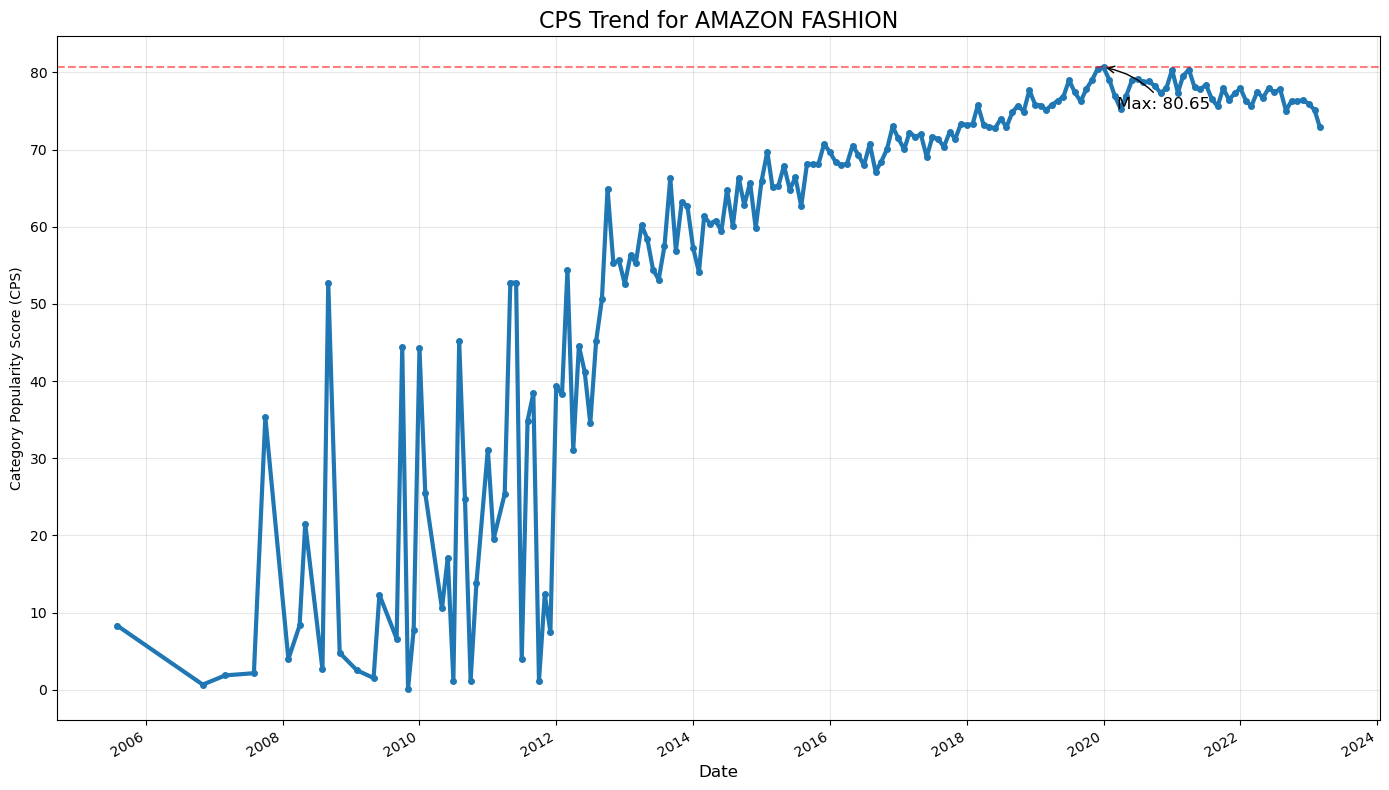

In [46]:
plot_category_cps("AMAZON FASHION")

In [47]:
def plot_category_cps_yearly(category_name, year):
    # Validate if category exists in the dataset
    if category_name not in cps_summary['category'].unique():
        print(f"Error: Category '{category_name}' not found in the dataset.")
        print("Available categories:")
        for cat in sorted(cps_summary['category'].unique()):
            print(f"- {cat}")
        return
    
    # Filter data for the specified category and year
    category_subset = cps_summary[(cps_summary['category'] == category_name) & 
                                 (cps_summary['year'] == year)].copy()
    
    # Check if there's data for this year
    if len(category_subset) == 0:
        print(f"No data available for {category_name} in {year}.")
        # Show available years for this category
        available_years = sorted(cps_summary[cps_summary['category'] == category_name]['year'].unique())
        print(f"Available years for {category_name}: {available_years}")
        return
    
    # Convert to datetime for better plotting
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    
    # Sort by month
    category_subset = category_subset.sort_values('month')
    
    # Create figure and plot
    plt.figure(figsize=(14, 8))
    plt.plot(category_subset['date'], category_subset['CPS scaled'], 
             linestyle='-', linewidth=3, marker='o', markersize=8)
    
    # Calculate and add maximum value reference
    max_value = category_subset['CPS scaled'].max()
    max_date = category_subset.loc[category_subset['CPS scaled'].idxmax(), 'date']
    max_month = category_subset.loc[category_subset['CPS scaled'].idxmax(), 'month']
    
    # Add horizontal line for maximum value
    plt.axhline(y=max_value, color='r', linestyle='--', alpha=0.5)
    
    # Annotate the maximum point
    plt.annotate(f"Max: {max_value:.2f} (Month {max_month})",
                xy=(max_date, max_value),
                xytext=(10, -30),
                textcoords='offset points',
                fontsize=12,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    # Set titles and labels
    plt.title(f"Monthly CPS Trend for {category_name} in {year}", fontsize=16)
    plt.ylabel('Category Popularity Score (CPS)')
    plt.xlabel('Month', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Format x-axis to show month names
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Short month name
    
    plt.tight_layout()
    plt.show()

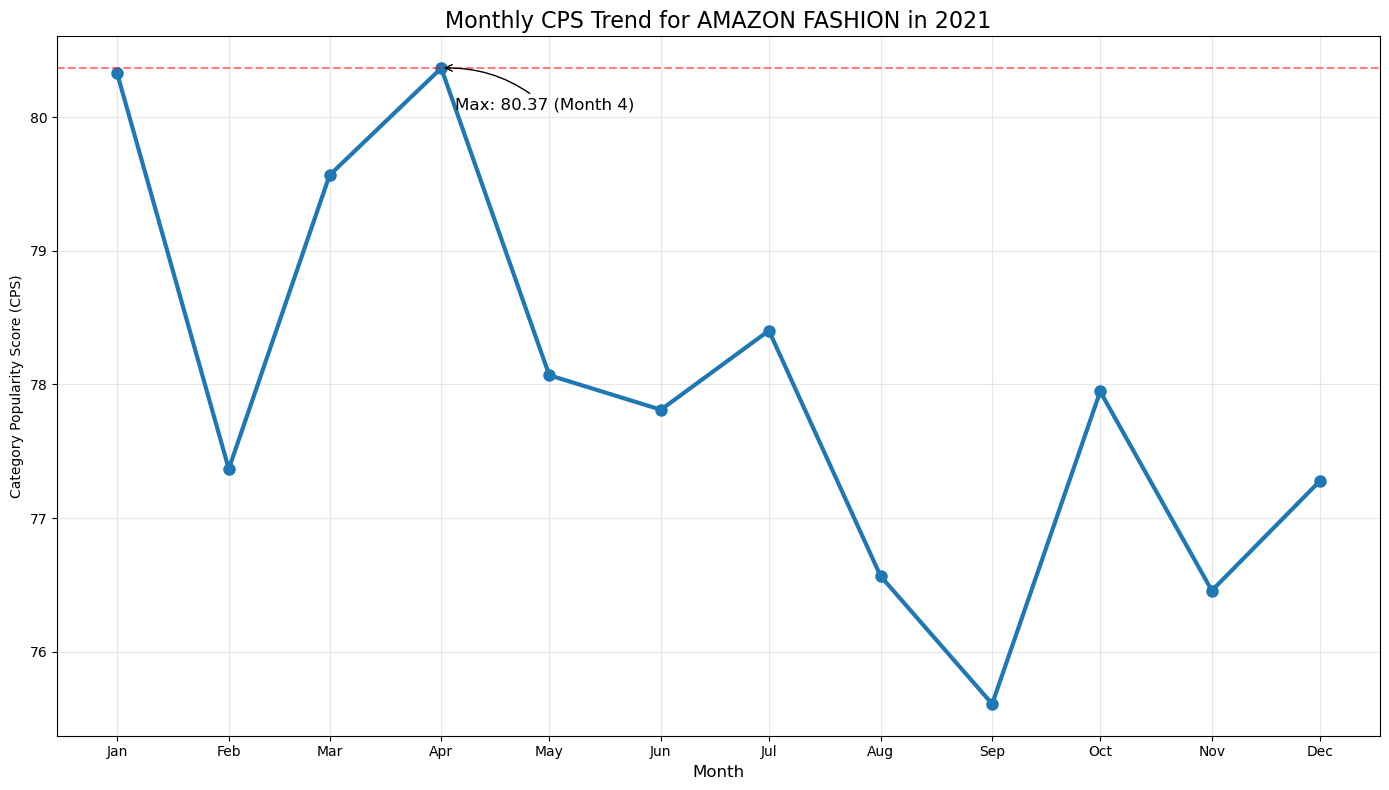

In [48]:
plot_category_cps_yearly("AMAZON FASHION", 2021)

## Top 5 categories by greatest growth

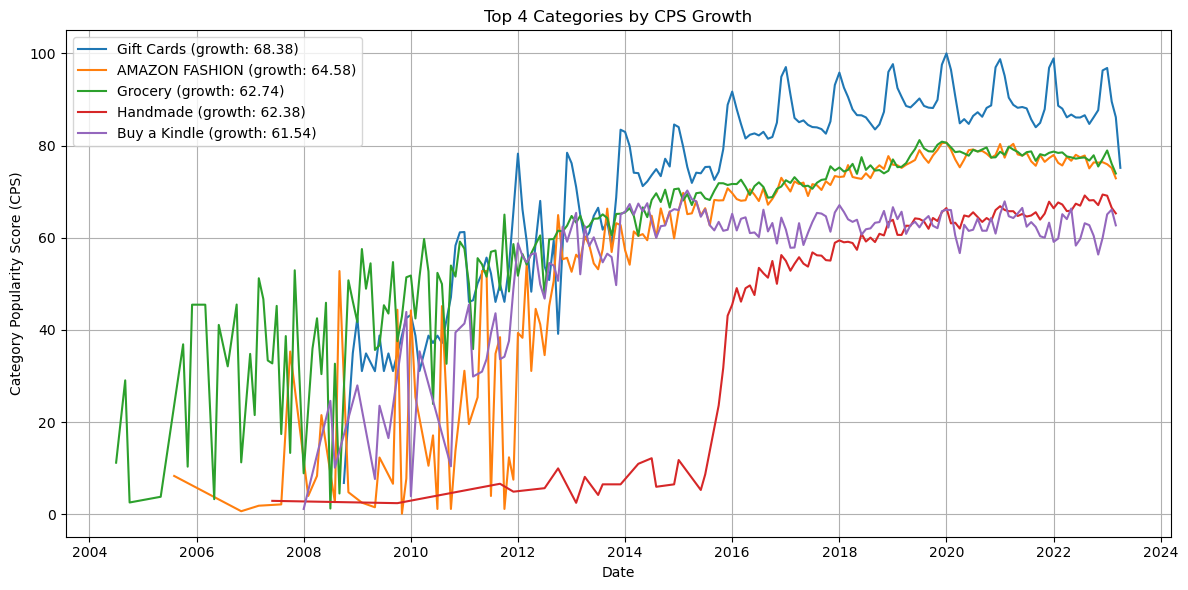

In [49]:
growth_by_category = {}
    
for category in cps_summary['category'].unique():
    category_data = cps_summary[cps_summary['category'] == category].sort_values(['year', 'month'])
    if len(category_data) >= 2:  # Need at least 2 data points to calculate growth
        first_cps = category_data['CPS scaled'].iloc[0]
        last_cps = category_data['CPS scaled'].iloc[-1]
        growth = last_cps - first_cps
        growth_by_category[category] = growth

# Get top 4 categories by growth
top_growth_categories = sorted(growth_by_category.items(), key=lambda x: x[1], reverse=True)[:5]
top_categories = [cat for cat, _ in top_growth_categories]

plt.figure(figsize=(12, 6))
for category in top_categories:
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    plt.plot(category_subset['date'], category_subset['CPS scaled'], 
                label=f"{category} (growth: {growth_by_category[category]:.2f})")

plt.xlabel('Date')
plt.ylabel('Category Popularity Score (CPS)')
plt.title('Top 4 Categories by CPS Growth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

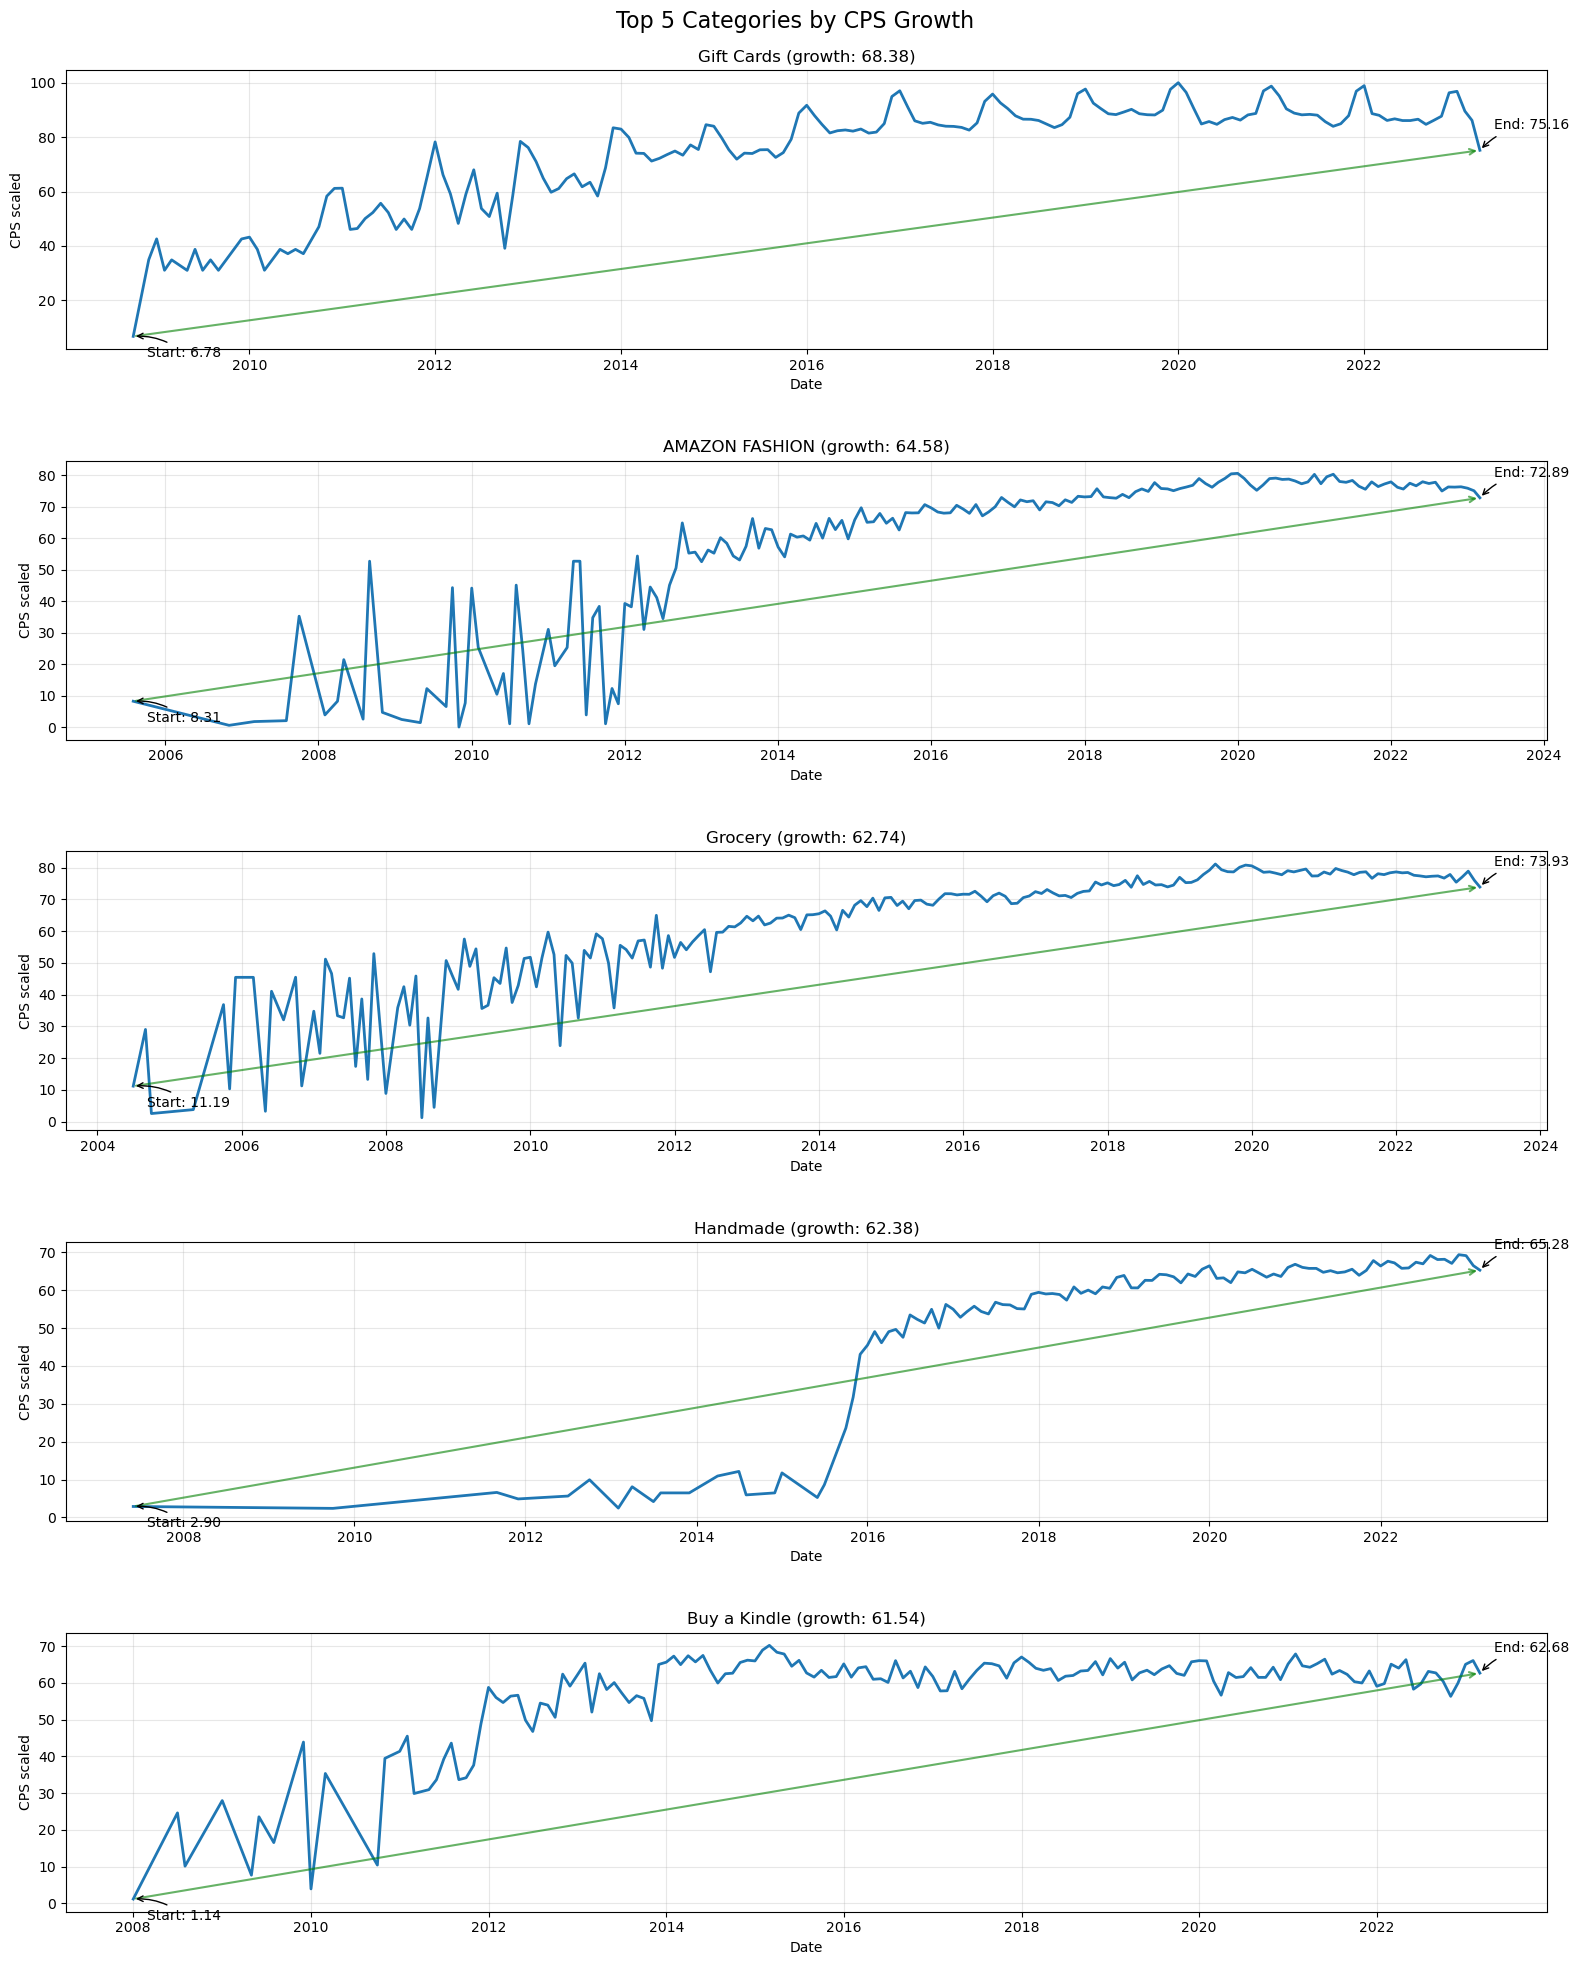

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate growth for each category
growth_by_category = {}
    
for category in cps_summary['category'].unique():
    category_data = cps_summary[cps_summary['category'] == category].sort_values(['year', 'month'])
    if len(category_data) >= 2:  # Need at least 2 data points to calculate growth
        first_cps = category_data['CPS scaled'].iloc[0]
        last_cps = category_data['CPS scaled'].iloc[-1]
        growth = last_cps - first_cps
        growth_by_category[category] = growth

# Get top 5 categories by growth
top_growth_categories = sorted(growth_by_category.items(), key=lambda x: x[1], reverse=True)[:5]
top_categories = [cat for cat, _ in top_growth_categories]

# Create a figure with 5 subplots (one for each category)
fig, axes = plt.subplots(5, 1, figsize=(16, 20), sharex=False)
fig.suptitle('Top 5 Categories by CPS Growth', fontsize=16)

# Plot each category in its own subplot
for i, category in enumerate(top_categories):
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    
    axes[i].plot(category_subset['date'], category_subset['CPS scaled'], 
                 linestyle='-', linewidth=2)
    
    # Show the growth with a line from first to last point
    first_date = category_subset['date'].iloc[0]
    last_date = category_subset['date'].iloc[-1]
    first_cps = category_subset['CPS scaled'].iloc[0]
    last_cps = category_subset['CPS scaled'].iloc[-1]
    
    # Add a subtle arrow showing the growth
    axes[i].annotate("", 
                    xy=(last_date, last_cps), 
                    xytext=(first_date, first_cps),
                    arrowprops=dict(arrowstyle="->", color="green", lw=1.5, alpha=0.6),
                    annotation_clip=False)
    
    # Set category title and labels
    growth = growth_by_category[category]
    axes[i].set_title(f"{category} (growth: {growth:.2f})")
    axes[i].set_ylabel('CPS scaled')
    axes[i].set_xlabel('Date')  # Add x-label to each subplot
    axes[i].grid(True, alpha=0.3)
    
    # Annotate the first and last points
    axes[i].annotate(f"Start: {first_cps:.2f}",
                    xy=(first_date, first_cps),
                    xytext=(10, -15),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    axes[i].annotate(f"End: {last_cps:.2f}",
                    xy=(last_date, last_cps),
                    xytext=(10, 15),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Set common figure properties
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)  # Increased spacing between subplots
plt.show()

## Small multiples - show individual plots for top categories
Overall Patterns

Long-term Growth Trend: All five categories show a strong upward trajectory from early 2000s to around 2020-2022, with CPS values generally increasing from low values (0-20) to high values (70-80).
Recent Plateau/Decline: Interestingly, all categories show a slight decline or plateau after reaching their peaks around 2020-2022, suggesting a potential market correction or saturation.
Two Distinct Phases: Most categories exhibit an early phase of high volatility and lower values (2000-2014), followed by a more stable growth phase with higher values (2015-2023).

Category-Specific Insights

Amazon Fashion (highest volatility, std: 24.85):

Shows extreme volatility in the early period (2005-2012) with dramatic spikes and drops
Most unstable pricing among all categories
Stabilized significantly after 2014, showing steady growth thereafter
Peak CPS around 2020-2021


Health & Personal Care (std: 23.29):

Second most volatile category
Shows erratic behavior in early years similar to Amazon Fashion
Reached peak values slightly later than other categories
More jagged fluctuations throughout its growth phase compared to others


Handmade (std: 21.59):

Shows the most dramatic shift in the dataset
Had minimal data and low CPS values until around 2014-2015
Then experienced an extremely steep rise
This suggests this might be a newer category that was established or tracked later than others


All Electronics (std: 20.98):

Shows consistent volatility throughout the timeline
Has more frequent small ups and downs even during its growth phase
Technology pricing tends to fluctuate based on release cycles and market competition


All Beauty (std: 20.61):

Shows similar patterns to Amazon Fashion and Health & Personal Care
Relatively high early volatility that stabilizes into steady growth
Peaks around the same time as other categories (2020-2022)



Key Observations

Synchronous Peaks: All five categories reached their maximum CPS values around the same time period (2020-2022), suggesting a broader market factor affecting all categories simultaneously (possibly pandemic-related consumer behavior).
Consistent Low Points: The minimum values for most categories occurred in the early time periods (2005-2007), indicating either initial market entry or data collection differences.
Volatility Reduction: All categories show significantly reduced volatility after 2015, suggesting market maturation or improved pricing strategies.
Potential COVID Impact: The data appears to show peaks during the COVID-19 pandemic period (2020-2022), which aligns with known increases in e-commerce activity during lockdowns.
Category Emergence: The Handmade category shows a distinct pattern that suggests it was introduced to the platform much later than other categories, with minimal data before 2014-2015.


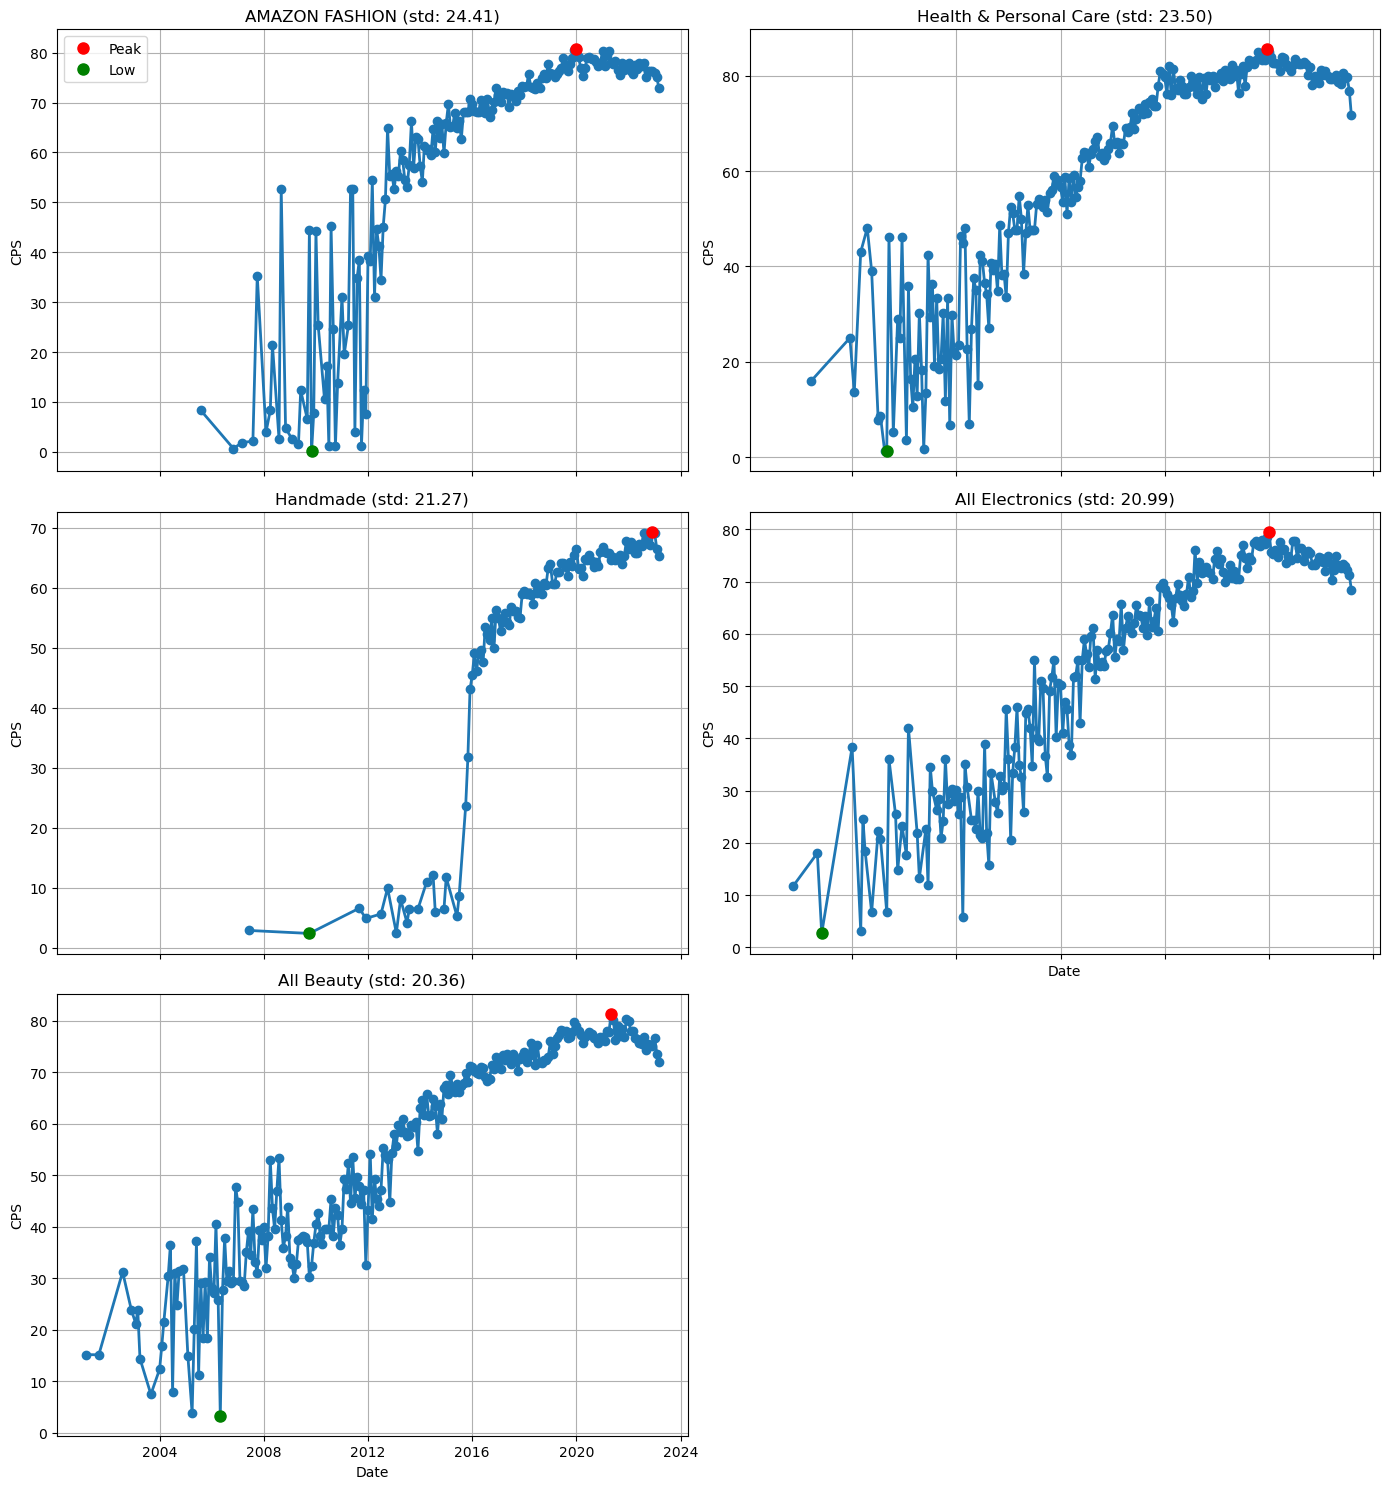

In [51]:
category_fluctuations = {}
for category in cps_summary['category'].unique():
    category_subset = cps_summary[cps_summary['category'] == category]
    fluctuation = category_subset['CPS scaled'].std()
    category_fluctuations[category] = fluctuation

# Get top 5 categories
top_categories = sorted(category_fluctuations.items(), key=lambda x: x[1], reverse=True)[:5]
top_category_names = [cat for cat, _ in top_categories]

# Create a 3x2 grid of subplots (6 total, we'll use 5)
fig, axes = plt.subplots(3, 2, figsize=(14, 15), sharex=True)
axes = axes.flatten()

for i, category in enumerate(top_category_names):
    category_subset = cps_summary[cps_summary['category'] == category].copy()
    category_subset.loc[:, 'date'] = pd.to_datetime(
        category_subset[['year', 'month']].assign(day=1)
    )
    
    axes[i].plot(category_subset['date'], category_subset['CPS scaled'], 
                marker='o', linestyle='-', linewidth=2)
    axes[i].set_title(f"{category} (std: {category_fluctuations[category]:.2f})")
    axes[i].set_ylabel('CPS')
    axes[i].grid(True)
    
    # Highlight min and max points
    max_idx = category_subset['CPS scaled'].idxmax()
    min_idx = category_subset['CPS scaled'].idxmin()
    
    axes[i].plot(category_subset.loc[max_idx, 'date'], 
                category_subset.loc[max_idx, 'CPS scaled'], 
                'ro', markersize=8, label='Peak')
    
    axes[i].plot(category_subset.loc[min_idx, 'date'], 
                category_subset.loc[min_idx, 'CPS scaled'], 
                'go', markersize=8, label='Low')
    
    if i >= 3:  # Only add x-label to bottom row plots
        axes[i].set_xlabel('Date')
        
    if i == 0:  # Only add legend to first plot
        axes[i].legend()

# Hide the unused subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

# Using BPCPS

## Top 5 brands within a category over time

In [52]:
bpcps_summary.head(3)

Unnamed: 0        category     brand  year  month     BPCPS  BPCPS scaled
0       80006  AMAZON FASHION  aamilife  2017     12  1.081805      2.271731
1       80005  AMAZON FASHION  aamilife  2018      4  3.031341     12.969987
2       80007  AMAZON FASHION  aamilife  2019      5  1.589235      5.056300

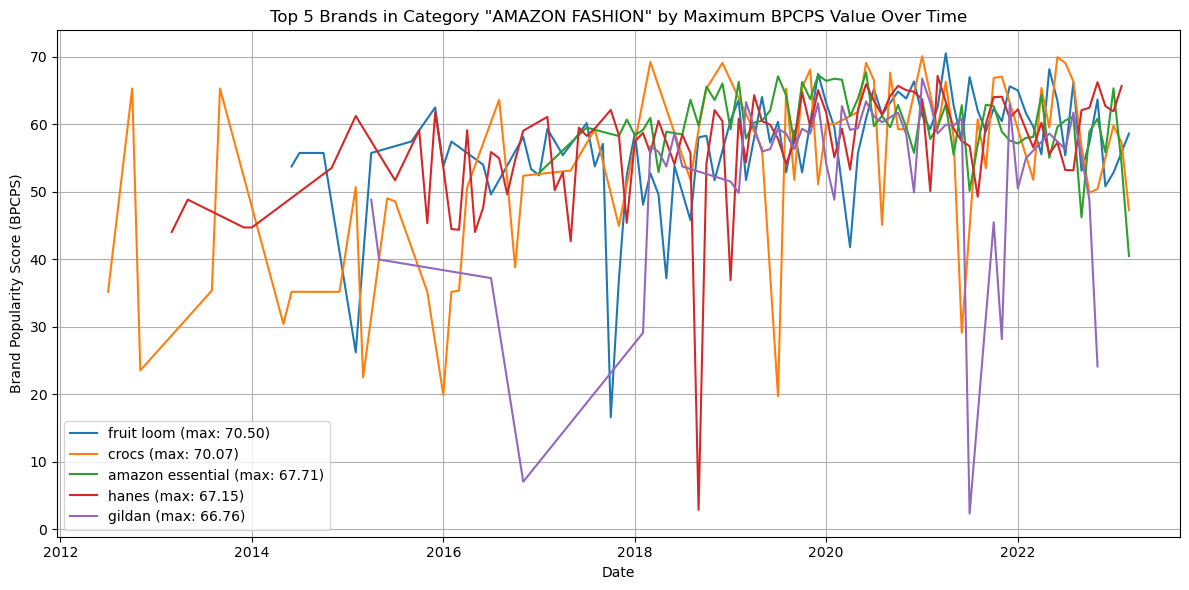

In [53]:
selected_category = 'AMAZON FASHION'
# Filter dataframe for selected category
category_df = bpcps_summary[bpcps_summary['category'] == selected_category].copy()
# Find max CPS scaled per brand within the category
top_brands = category_df.groupby('brand')['BPCPS scaled'].max().nlargest(5).index.tolist()
plt.figure(figsize=(12, 6))
for brand in top_brands:
    brand_df = category_df[category_df['brand'] == brand].copy()
    # Convert year and month to datetime
    brand_df['date'] = pd.to_datetime(brand_df[['year', 'month']].assign(day=1))
    brand_df = brand_df.sort_values('date')
    plt.plot(brand_df['date'], brand_df['BPCPS scaled'], label=f"{brand} (max: {brand_df['BPCPS scaled'].max():.2f})")
plt.xlabel('Date')
plt.ylabel('Brand Popularity Score (BPCPS)')
plt.title(f'Top 5 Brands in Category "{selected_category}" by Maximum BPCPS Value Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

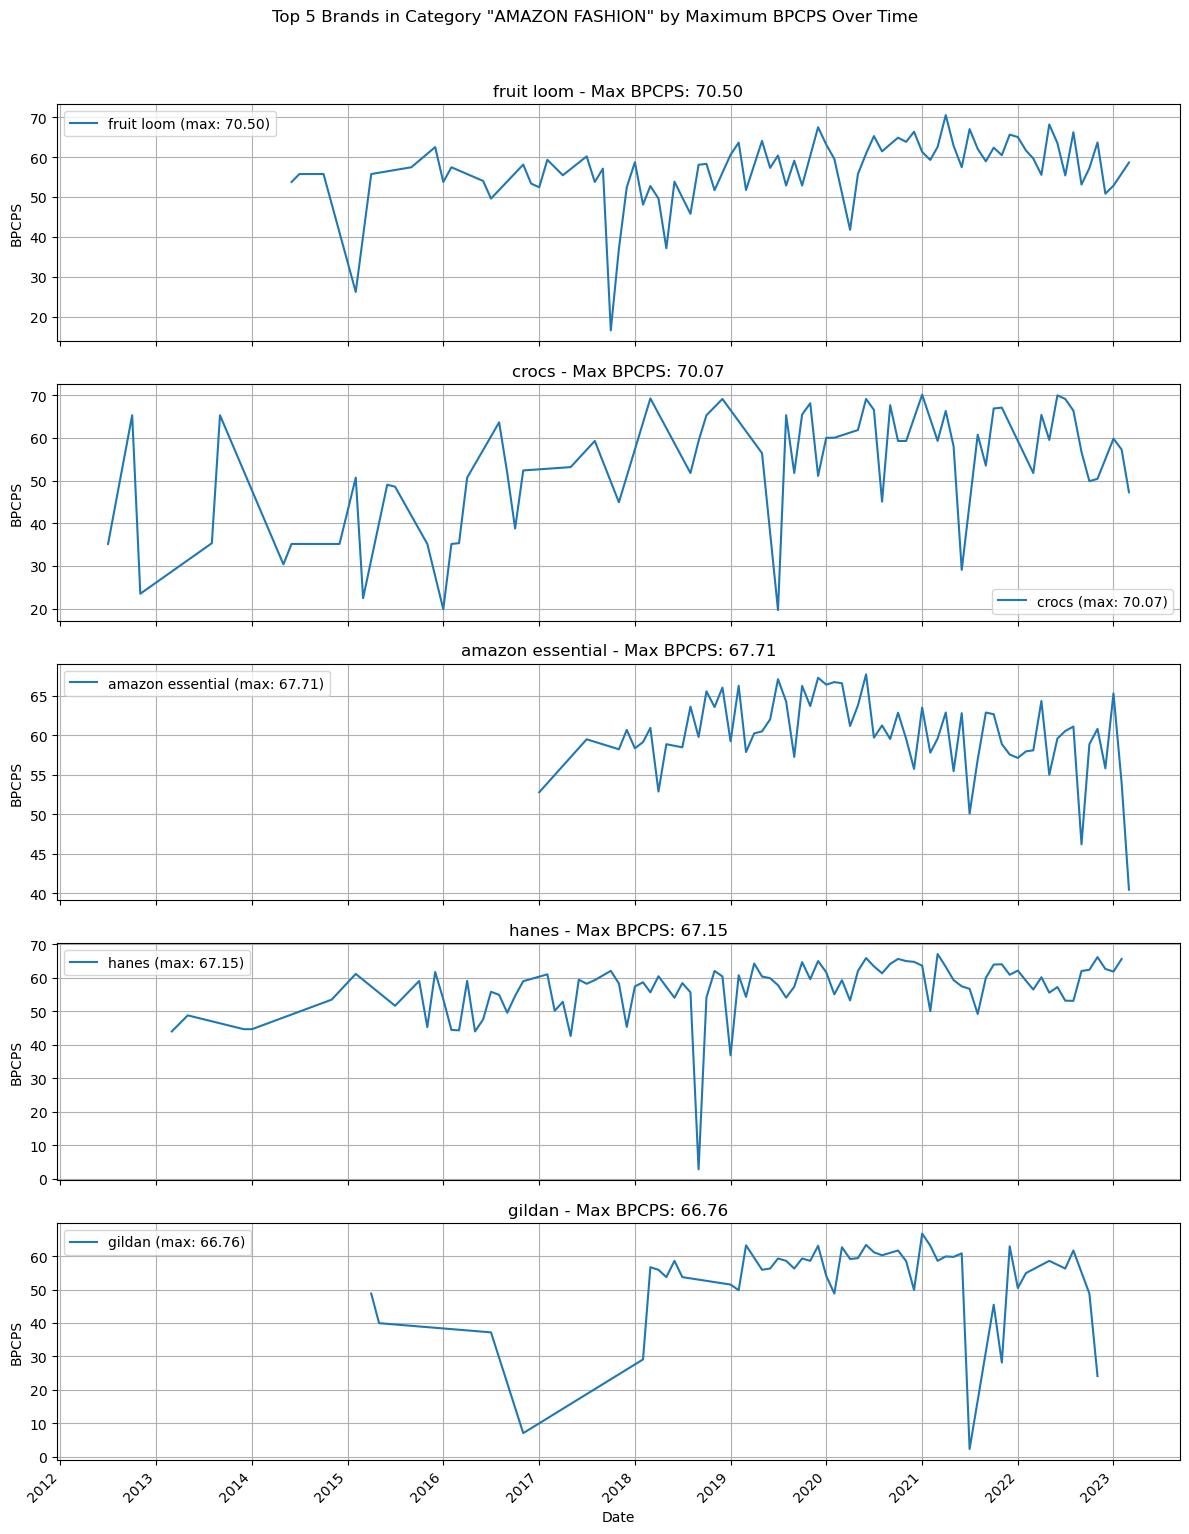

In [54]:
selected_category = 'AMAZON FASHION'

# Filter dataframe for selected category
category_df = bpcps_summary[bpcps_summary['category'] == selected_category].copy()

# Find max CPS scaled per brand within the category
top_brands = category_df.groupby('brand')['BPCPS scaled'].max().nlargest(5).index.tolist()

fig, axs = plt.subplots(len(top_brands), 1, figsize=(12, 3 * len(top_brands)), sharex=True)

for i, brand in enumerate(top_brands):
    brand_df = category_df[category_df['brand'] == brand].copy()
    # Convert year and month to datetime
    brand_df['date'] = pd.to_datetime(brand_df[['year', 'month']].assign(day=1))
    brand_df = brand_df.sort_values('date')
    axs[i].plot(brand_df['date'], brand_df['BPCPS scaled'], label=f"{brand} (max: {brand_df['BPCPS scaled'].max():.2f})")
    axs[i].set_ylabel('BPCPS')
    axs[i].set_title(f"{brand} - Max BPCPS: {brand_df['BPCPS scaled'].max():.2f}")
    axs[i].grid(True)
    axs[i].legend()
    # Set major ticks to yearly intervals
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Rotate year labels for readability
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45, ha='right')

axs[-1].set_xlabel('Date')

plt.suptitle(f'Top 5 Brands in Category "{selected_category}" by Maximum BPCPS Over Time', y=1.02)
plt.tight_layout()
plt.show()

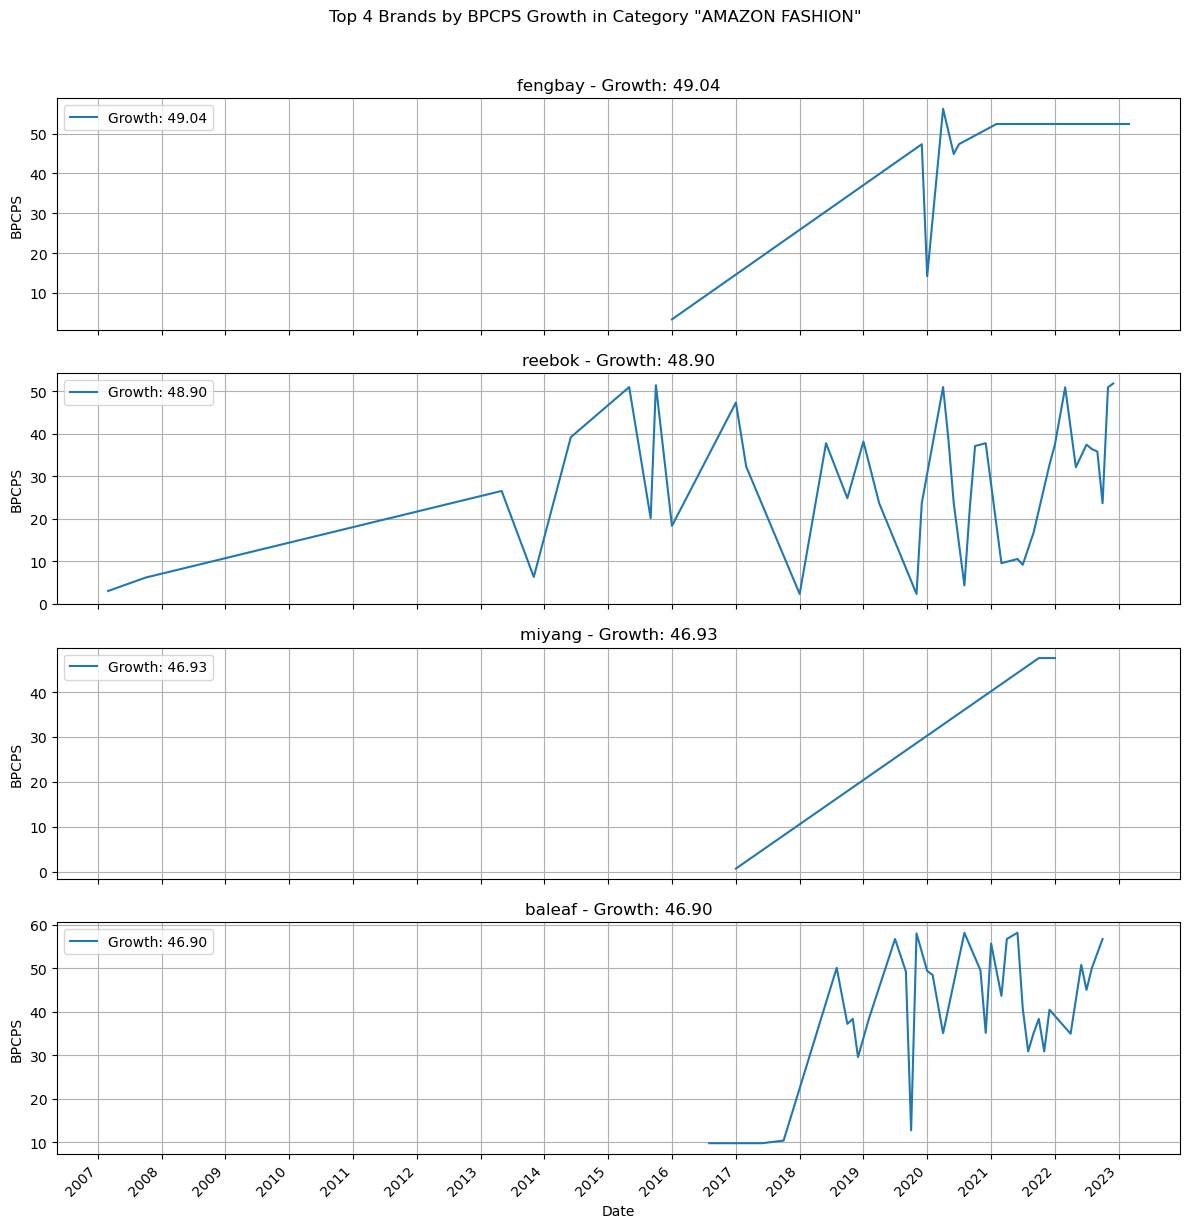

In [55]:
selected_category = 'AMAZON FASHION'

# Filter dataframe for selected category
category_df = bpcps_summary[bpcps_summary['category'] == selected_category].copy()

# Calculate growth for each brand within the selected category
growth_by_brand = {}
for brand in category_df['brand'].unique():
    brand_data = category_df[category_df['brand'] == brand].sort_values(['year', 'month'])
    if len(brand_data) >= 2:
        first_bpcps = brand_data['BPCPS scaled'].iloc[0]
        last_bpcps = brand_data['BPCPS scaled'].iloc[-1]
        growth = last_bpcps - first_bpcps
        growth_by_brand[brand] = growth

# Get top 4 brands by growth
top_growth_brands = sorted(growth_by_brand.items(), key=lambda x: x[1], reverse=True)[:4]
top_brands = [brand for brand, _ in top_growth_brands]

fig, axs = plt.subplots(len(top_brands), 1, figsize=(12, 3 * len(top_brands)), sharex=True)

for i, brand in enumerate(top_brands):
    brand_subset = category_df[category_df['brand'] == brand].copy()
    brand_subset['date'] = pd.to_datetime(brand_subset[['year', 'month']].assign(day=1))
    brand_subset = brand_subset.sort_values('date')
    axs[i].plot(brand_subset['date'], brand_subset['BPCPS scaled'], label=f"Growth: {growth_by_brand[brand]:.2f}", marker=None)
    axs[i].set_ylabel('BPCPS')
    axs[i].set_title(f"{brand} - Growth: {growth_by_brand[brand]:.2f}")
    axs[i].grid(True)
    axs[i].legend()
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45, ha='right')

axs[-1].set_xlabel('Date')
plt.suptitle(f'Top 4 Brands by BPCPS Growth in Category "{selected_category}"', y=1.02)
plt.tight_layout()
plt.show()

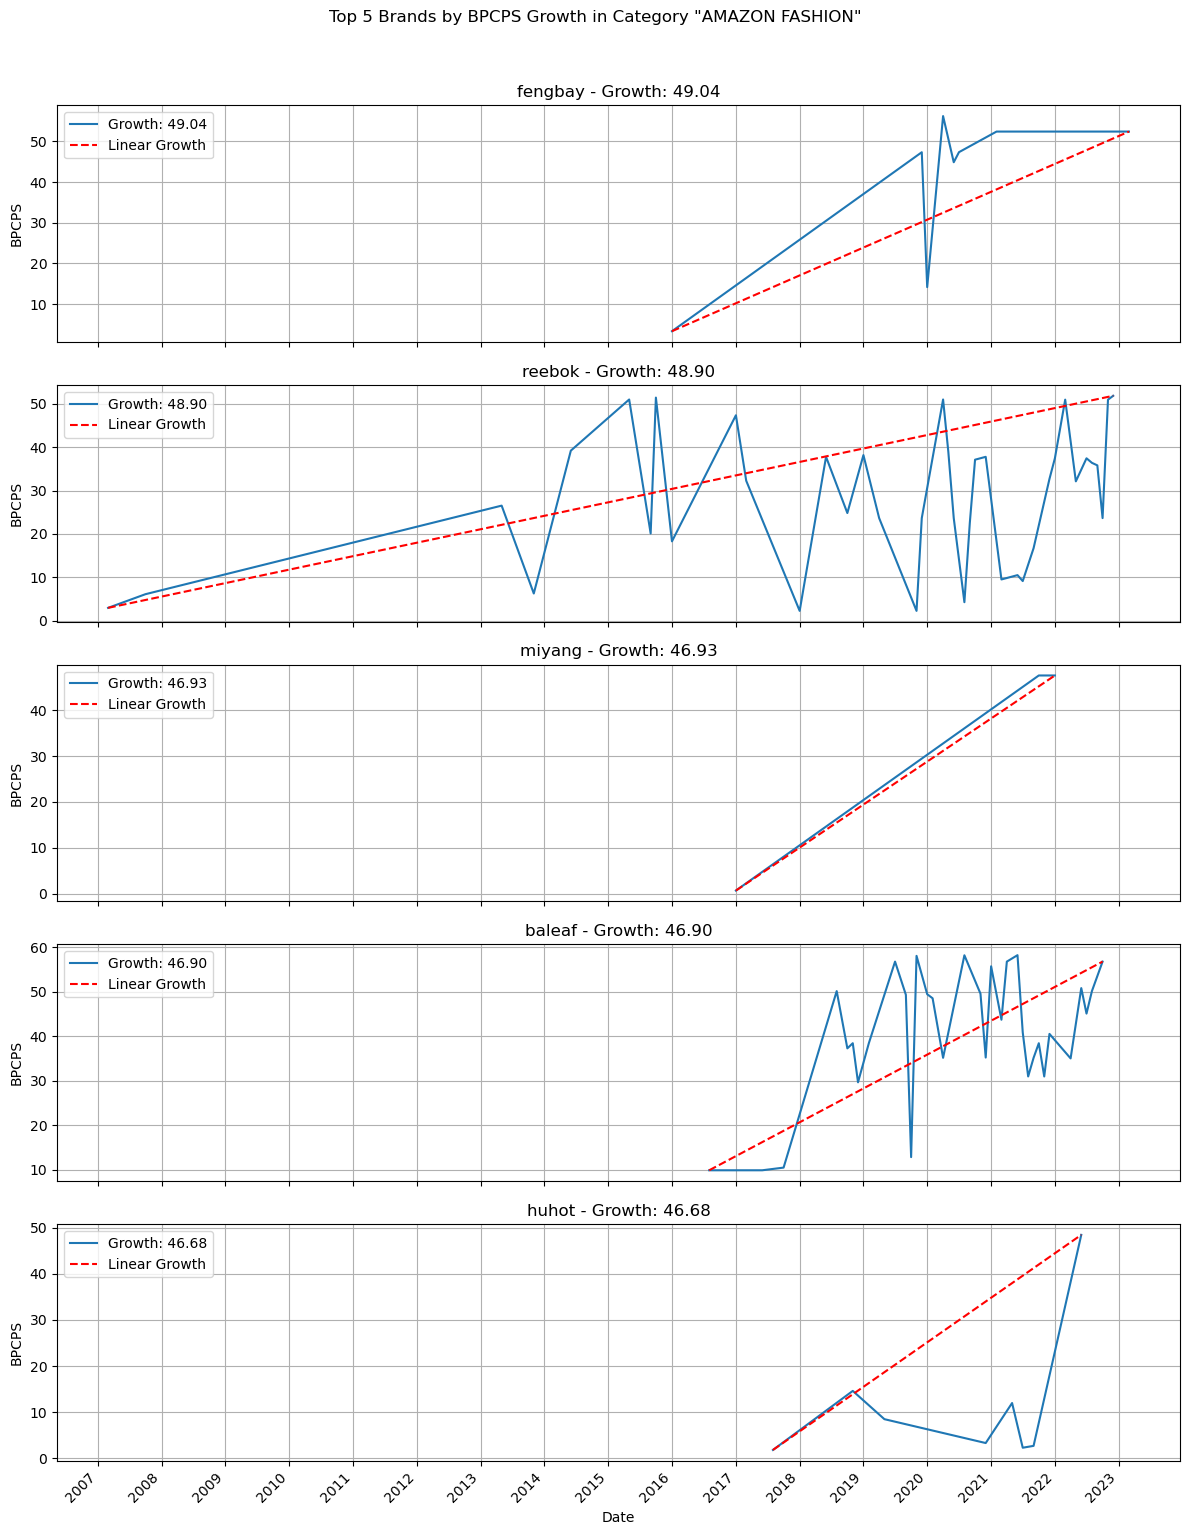

In [56]:
selected_category = 'AMAZON FASHION'
# Filter dataframe for selected category
category_df = bpcps_summary[bpcps_summary['category'] == selected_category].copy()
growth_by_brand = {}
for brand in category_df['brand'].unique():
    brand_data = category_df[category_df['brand'] == brand].sort_values(['year', 'month'])
    
    if len(brand_data) >= 2:
        first_bpcps = brand_data['BPCPS scaled'].iloc[0]
        last_bpcps = brand_data['BPCPS scaled'].iloc[-1]
        growth = last_bpcps - first_bpcps
        growth_by_brand[brand] = growth

# Get top 4 brands by growth
top_growth_brands = sorted(growth_by_brand.items(), key=lambda x: x[1], reverse=True)[:5]
top_brands = [brand for brand, _ in top_growth_brands]
fig, axs = plt.subplots(len(top_brands), 1, figsize=(12, 3 * len(top_brands)), sharex=True)
for i, brand in enumerate(top_brands):
    brand_subset = category_df[category_df['brand'] == brand].copy()
    brand_subset['date'] = pd.to_datetime(brand_subset[['year', 'month']].assign(day=1))
    brand_subset = brand_subset.sort_values('date')
    # Plot actual BPCPS scaled time series without markers
    axs[i].plot(brand_subset['date'], brand_subset['BPCPS scaled'], label=f"Growth: {growth_by_brand[brand]:.2f}", marker=None)
    # Line from first to last point
    dates_num = mdates.date2num(brand_subset['date'])
    x_vals = [dates_num[0], dates_num[-1]]
    y_vals = [brand_subset['BPCPS scaled'].iloc[0], brand_subset['BPCPS scaled'].iloc[-1]]
    axs[i].plot(x_vals, y_vals, linestyle='--', color='red', label='Linear Growth')
    axs[i].set_ylabel('BPCPS')
    axs[i].set_title(f"{brand} - Growth: {growth_by_brand[brand]:.2f}")
    axs[i].grid(True)
    axs[i].legend()

    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45, ha='right')
axs[-1].set_xlabel('Date')
plt.suptitle(f'Top 5 Brands by BPCPS Growth in Category "{selected_category}"', y=1.02)
plt.tight_layout()
plt.show()

In [66]:
months= range(1, 13) #1 -> 12
month_names= ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']

columnOrder= []
for i in month_names:
    columnOrder.extend([f"{i}_Total", f"{i}_Ratio"])

# Visualization for all categories and their popularity over the months

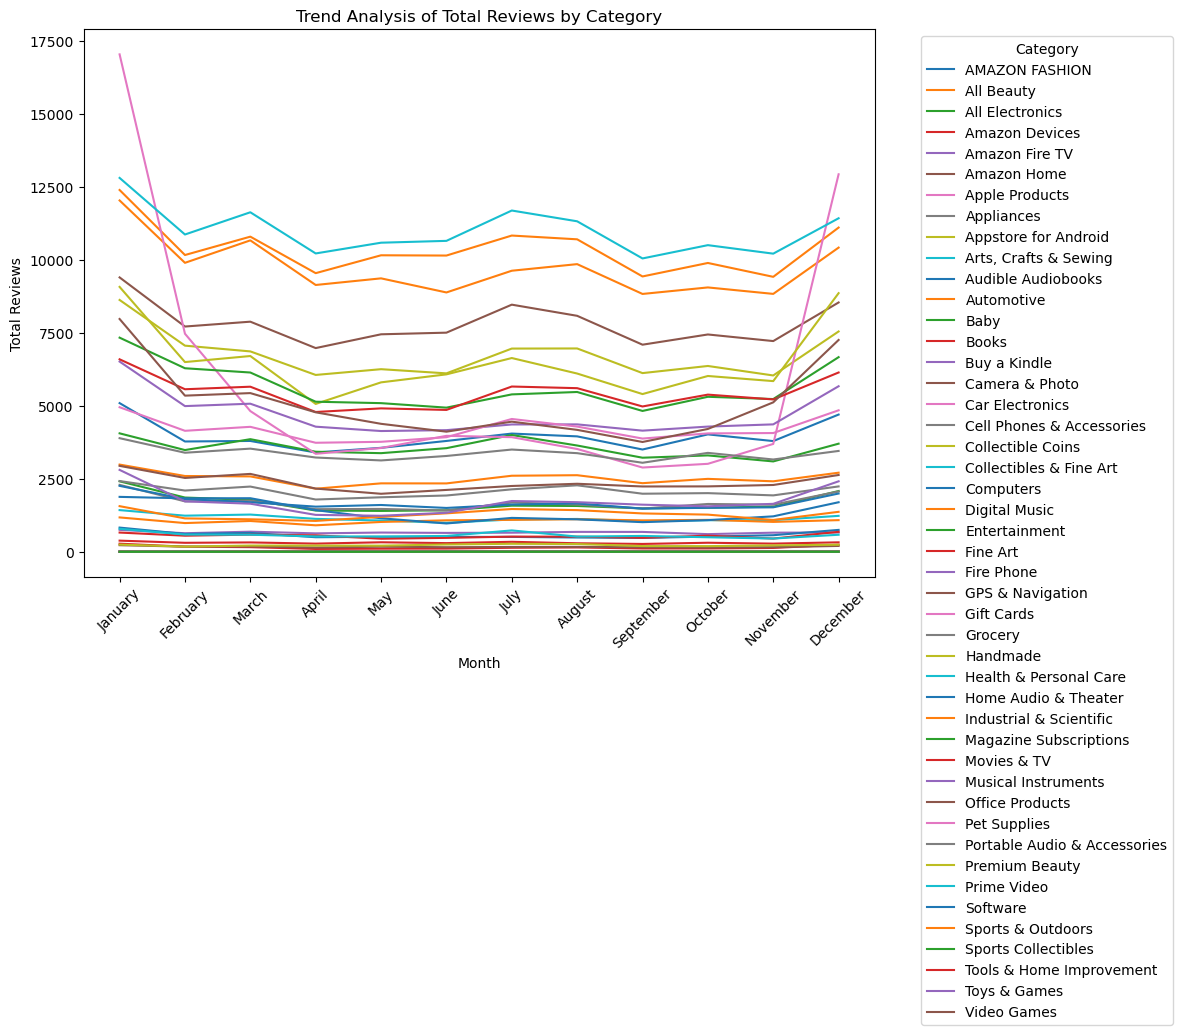

In [67]:
#get total columns
totalCols = [col for col in totalRatio.columns if '_Total' in col]

#melt the frame
melted= totalRatio.melt(id_vars='category', value_vars=totalCols, var_name='Month', value_name='TotalReviews')

melted['Month'] = melted['Month'].str.replace('_Total', '')
melted['Month'] = pd.Categorical(melted['Month'], categories=month_names, ordered=True)

#plot 
plt.figure(figsize=(12, 9))
for category in melted['category'].unique():
    category_data = melted[melted['category'] == category]
    plt.plot(category_data['Month'], category_data['TotalReviews'], label=category)

#supposed to get the max value but it dont work :\
# max_point = category_data.loc[category_data['TotalReviews'].idxmax()]
# plt.text(max_point['Month'], max_point['TotalReviews'], category, fontsize=9, ha='center', va='bottom')

plt.title('Trend Analysis of Total Reviews by Category')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for single category popularity

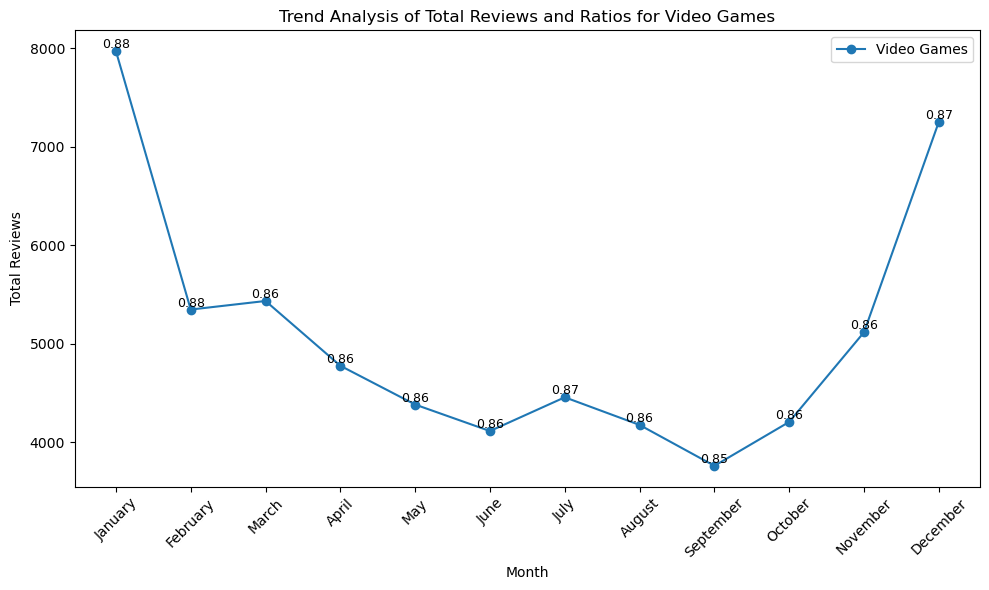

In [68]:
#chosen category
selected = "Video Games"

#get the columns for each (WHY IS IT SO COMPLICTED TO GET THE DAMN RATIO TO SHOW)
total_review_cols = [col for col in totalRatio.columns if '_Total' in col]
ratio_cols = [col for col in totalRatio.columns if '_Ratio' in col]

# grab the categories from the categories frame
category_data = totalRatio[totalRatio['category'] == selected]

#melt frames to have each set of data
melted_reviews = category_data.melt(id_vars='category', value_vars=total_review_cols, var_name='Month', value_name='TotalReviews')
melted_ratios = category_data.melt(id_vars='category', value_vars=ratio_cols, var_name='Month', value_name='Ratio')

#fix column names
melted_reviews['Month'] = melted_reviews['Month'].str.replace('_Total', '')
melted_ratios['Month'] = melted_ratios['Month'].str.replace('_Ratio', '')

#merge em back in
melted_data = pd.merge(melted_reviews, melted_ratios, on=['category', 'Month'])

#plot
plt.figure(figsize=(10, 6))
plt.plot(melted_data['Month'], melted_data['TotalReviews'], marker='o', label=selected)

#finally put the damn ratios
for i, row in melted_data.iterrows():
    plt.text(row['Month'], row['TotalReviews'], f"{row['Ratio']:.2f}", fontsize=9, ha='center', va='bottom')

plt.title(f'Trend Analysis of Total Reviews and Ratios for {selected}')
plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization for top 10 brands in a category and their popularity

In [69]:
#dataframe for brand information
brandTotal= final_predictions.groupby(['category', 'brand', 'month']).agg(totalReviews=('predictedSentiment', 'count'), positive=('predictedSentiment', 'sum')).reset_index()

brandTotal['ratio']= (brandTotal['positive'] / brandTotal['totalReviews']).round(2)

#pivot for reviews and ratios
brandMonth= brandTotal.pivot(index= ['category', 'brand'], columns= 'month', values= 'totalReviews').fillna(0)
brandRatio= brandTotal.pivot(index= ['category', 'brand'], columns= 'month', values= 'ratio').fillna(0)

#concat frames
# brandFinal= pd.concat(
#     [brandMonth.add_suffix('_Total'), brandRatio.add_suffix('_Ratio')]
# , axis= 1).reset_index()
brandFinal= pd.concat([
    brandMonth.rename(columns= dict(zip(months, [f"{i}_Total"for i in month_names]))),
    brandRatio.rename(columns= dict(zip(months, [f"{i}_Ratio"for i in month_names])))
], axis= 1)

# columnOrder= []
# for i in month_names:
#     columnOrder.extend([f"{i}_Total", f"{i}_Ratio"])

brandFinal= brandFinal[columnOrder].reset_index()

totalCols= [col for col in brandFinal.columns if '_Total' in col]
brandFinal[totalCols]= brandFinal[totalCols].astype(int)

# #sort by category
# brandTotal= brandTotal.sort_values(by=['category'])

brandFinal.head(1)

month        category     brand  January_Total  January_Ratio  February_Total  \
0      AMAZON FASHION  aamilife              1            1.0               0   

month  February_Ratio  March_Total  March_Ratio  April_Total  April_Ratio  \
0                 0.0            1          1.0            1          1.0   

month  ...  August_Total  August_Ratio  September_Total  September_Ratio  \
0      ...             0           0.0                0              0.0   

month  October_Total  October_Ratio  November_Total  November_Ratio  \
0                  0            0.0               0             0.0   

month  December_Total  December_Ratio  
0                   1             1.0  

[1 rows x 26 columns]

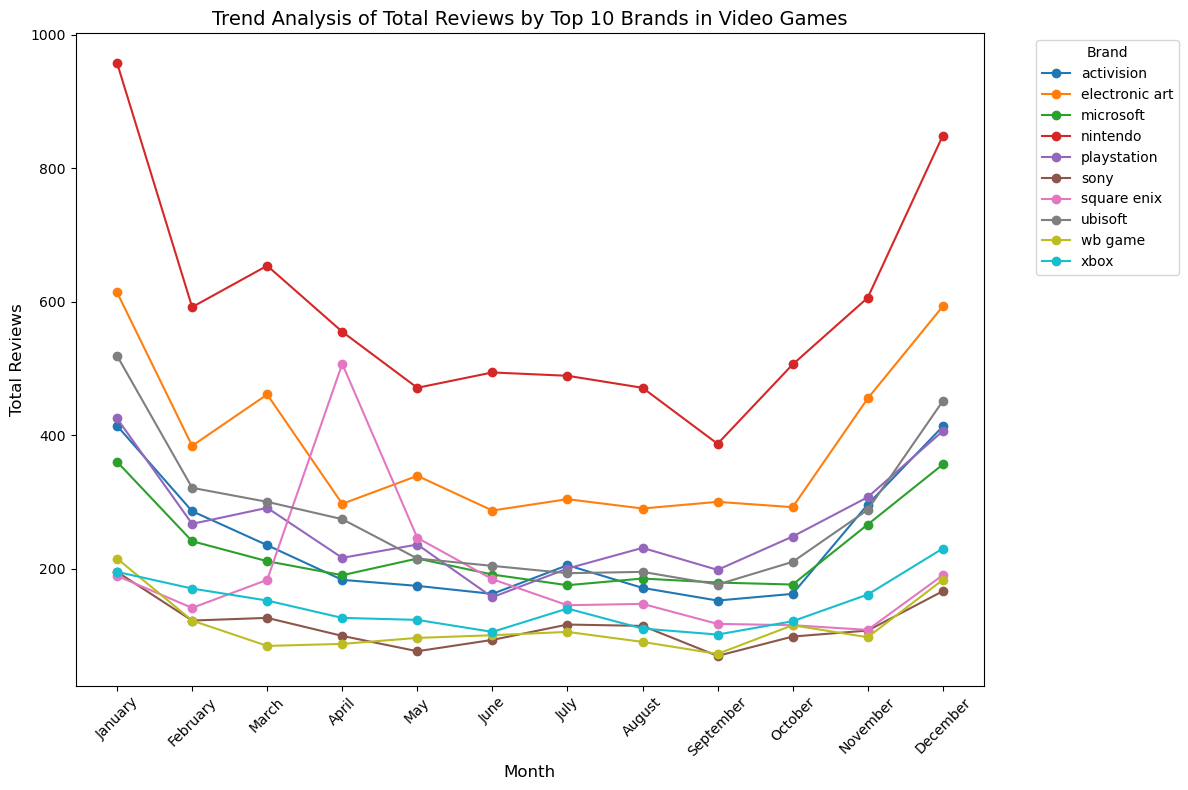

In [70]:
selected= "Video Games"

#Filter for brand
category_brands = brandTotal[brandTotal['category'] == selected]

#get total reviews for brands
brand_totals = category_brands.groupby('brand')['totalReviews'].sum().reset_index()

#Get the top 10
top_brands = brand_totals.nlargest(10, 'totalReviews')['brand']

#Filter the original frame to only include top 10 
top_brands_data = category_brands[category_brands['brand'].isin(top_brands)]

#repivot data
brand_monthly_reviews = top_brands_data.pivot(index='brand', columns='month', values='totalReviews').fillna(0)

#plot
plt.figure(figsize=(12, 8))
for brand in brand_monthly_reviews.index:
    plt.plot(brand_monthly_reviews.columns, brand_monthly_reviews.loc[brand], marker='o', label=brand)

plt.title(f'Trend Analysis of Total Reviews by Top 10 Brands in {selected}', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization of Two Brands Side by Side

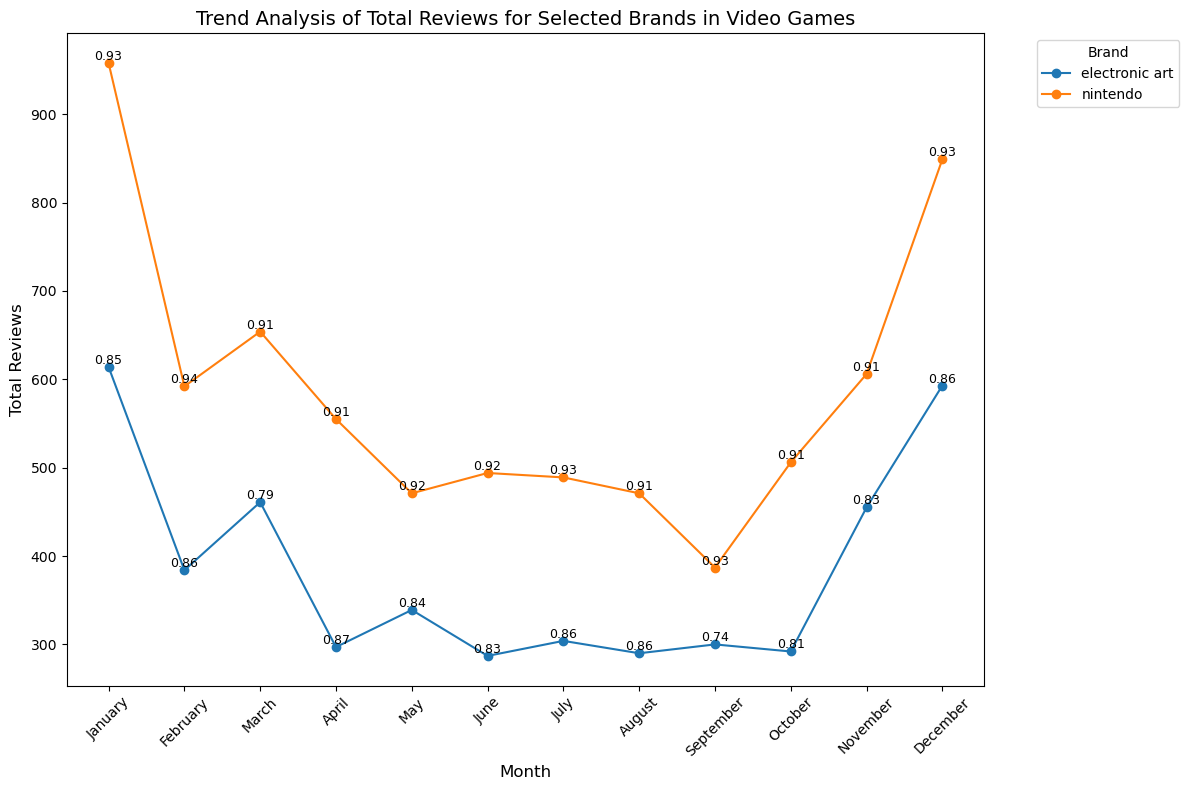

In [71]:
selected_category = "Video Games"  # Replace with the actual category name
selected_brands = ["nintendo", "electronic art"]  # Replace with the actual brand names

# Filter the DataFrame for the selected category and brands
category_brands = brandTotal[(brandTotal['category'] == selected_category) & 
                             (brandTotal['brand'].isin(selected_brands))]

# Pivot the data to have months as columns for totalReviews
brand_monthly_reviews = category_brands.pivot(index='brand', columns='month', values='totalReviews').fillna(0)
brand_monthly_ratios = category_brands.pivot(index='brand', columns='month', values='ratio').fillna(0)

# Plot the trend for the selected brands
plt.figure(figsize=(12, 8))
for brand in brand_monthly_reviews.index:
    plt.plot(brand_monthly_reviews.columns, brand_monthly_reviews.loc[brand], marker='o', label=brand)

    for month in brand_monthly_reviews.columns:
        total_reviews = brand_monthly_reviews.loc[brand, month]
        ratio = brand_monthly_ratios.loc[brand, month]
        plt.text(month, total_reviews, f"{ratio:.2f}", fontsize=9, ha='center', va='bottom')

# Add labels and title
plt.title(f'Trend Analysis of Total Reviews for Selected Brands in {selected_category}', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Reviews', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Correlation between review length and sentiment

Pearson correlation coefficient: 0.0355
P-value: 0.0000


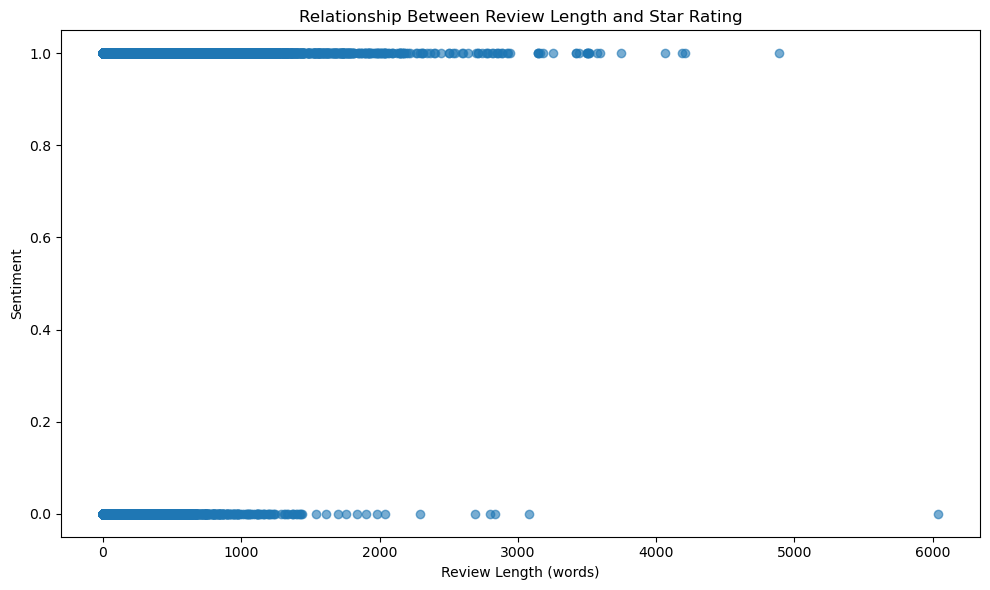

In [75]:
correlation, p_value = pearsonr(final_predictions['text_length'], final_predictions['predictedSentiment'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")



plt.figure(figsize=(10, 6))
plt.scatter(final_predictions['text_length'], final_predictions['predictedSentiment'], alpha=0.6)
plt.title('Relationship Between Review Length and Star Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Sentiment')


# plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}\nP-value: {p_value:.4f}', 
#          transform=plt.gca().transAxes, fontsize=12, 
#          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Getting positive features for a chosen brand

In [79]:
def extract_positive_features(text):
    if isinstance(text, str):
        tokens= word_tokenize(text)
        pos_tags= pos_tag(tokens)
        phrases= []
        for i in range(len(pos_tags) - 1):
            word, tag = pos_tags[i]
            next_word, next_tag = pos_tags[i + 1]
            # Check for adjective followed by a noun
            if tag in ['JJ', 'JJR', 'JJS'] and next_tag in ['NN', 'NNS', 'NNP', 'NNPS']:
                phrases.append(f"{word} {next_word}")
        return phrases
    return []

In [135]:

selected_category= "Video Games"  
selected_brand= "bethesda"      


stop_phrases= {"great game", "good", "game", "best game", "nice game", "fun game", 
                "good game", "amazing game", "awesome game", "favorite game", "love game"}


def filter_stop_phrases(phrases):
    return [phrase for phrase in phrases if phrase.lower() not in stop_phrases]

#filter the frame
brand_features= final_predictions[(final_predictions['category']== selected_category)& (final_predictions['brand']== selected_brand)]

#get positive features and block stop phrases
brand_features['positive_features']= brand_features['cleanedText'].apply(extract_positive_features)
brand_features['positive_features']= brand_features['positive_features'].apply(filter_stop_phrases)

#flatten list
all_phrases= [phrase for phrases in brand_features['positive_features'] for phrase in phrases]
phrase_counts= Counter(all_phrases)

#print features
print(f"Top positive features for {selected_brand} in {selected_category}:")
for feature, count in phrase_counts.most_common(10):
    print(f"  - {feature}: {count} occurrences")
print()

Top positive features for bethesda in Video Games:
  - single player: 33 occurrences
  - open world: 19 occurrences
  - long time: 17 occurrences
  - old school: 15 occurrences
  - much fun: 15 occurrences
  - first person: 14 occurrences
  - original doom: 12 occurrences
  - first time: 11 occurrences
  - bad guy: 11 occurrences
  - video game: 10 occurrences



C:\Users\saeed\AppData\Local\Temp\ipykernel_8104\1094145680.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_features['positive_features']= brand_features['cleanedText'].apply(extract_positive_features)
C:\Users\saeed\AppData\Local\Temp\ipykernel_8104\1094145680.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_features['positive_features']= brand_features['positive_features'].apply(filter_stop_phrases)


In [133]:
def category_popularity_sentiment(category_name, year=2021):
    """
    Create a dual-axis plot showing popularity score and sentiment ratio for a category by month
    """
    # Get CPS data for the category
    category_cps = cps_summary[(cps_summary['category'] == category_name) & 
                               (cps_summary['year'] == year)].sort_values('month')
    
    # Get sentiment ratio data for the category
    ratio_cols = [col for col in totalRatio.columns if '_Ratio' in col]
    category_ratio = totalRatio[totalRatio['category'] == category_name].melt(
        id_vars='category', 
        value_vars=ratio_cols,
        var_name='month',
        value_name='ratio'
    )
    category_ratio['month'] = category_ratio['month'].str.replace('_Ratio', '')
    category_ratio['month_num'] = category_ratio['month'].apply(lambda x: month_names.index(x) + 1)
    category_ratio = category_ratio.sort_values('month_num')
    
    # Create figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax2 = ax1.twinx()
    
    # Plot CPS on left axis
    line1 = ax1.plot(category_cps['month'], category_cps['CPS scaled'], 'b-o', linewidth=2, label='Popularity Score')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Category Popularity Score (CPS)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Plot sentiment ratio on right axis
    line2 = ax2.plot(category_ratio['month_num'], category_ratio['ratio'], 'r-o', linewidth=2, label='Sentiment Ratio')
    ax2.set_ylabel('Positive Sentiment Ratio', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Set tick labels to month names
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(month_names, rotation=45)
    
    # Add combined legend
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='lower left')
    
    # Calculate correlation
    common_months = set(category_cps['month']).intersection(set(category_ratio['month_num']))
    if common_months:
        cps_values = category_cps[category_cps['month'].isin(common_months)]['CPS scaled']
        ratio_values = category_ratio[category_ratio['month_num'].isin(common_months)]['ratio']
        correlation = cps_values.corr(ratio_values)
        plt.title(f'{category_name} - Popularity Score vs Sentiment Ratio ({year})')
    
    plt.tight_layout()
    plt.grid(False)
    plt.show()

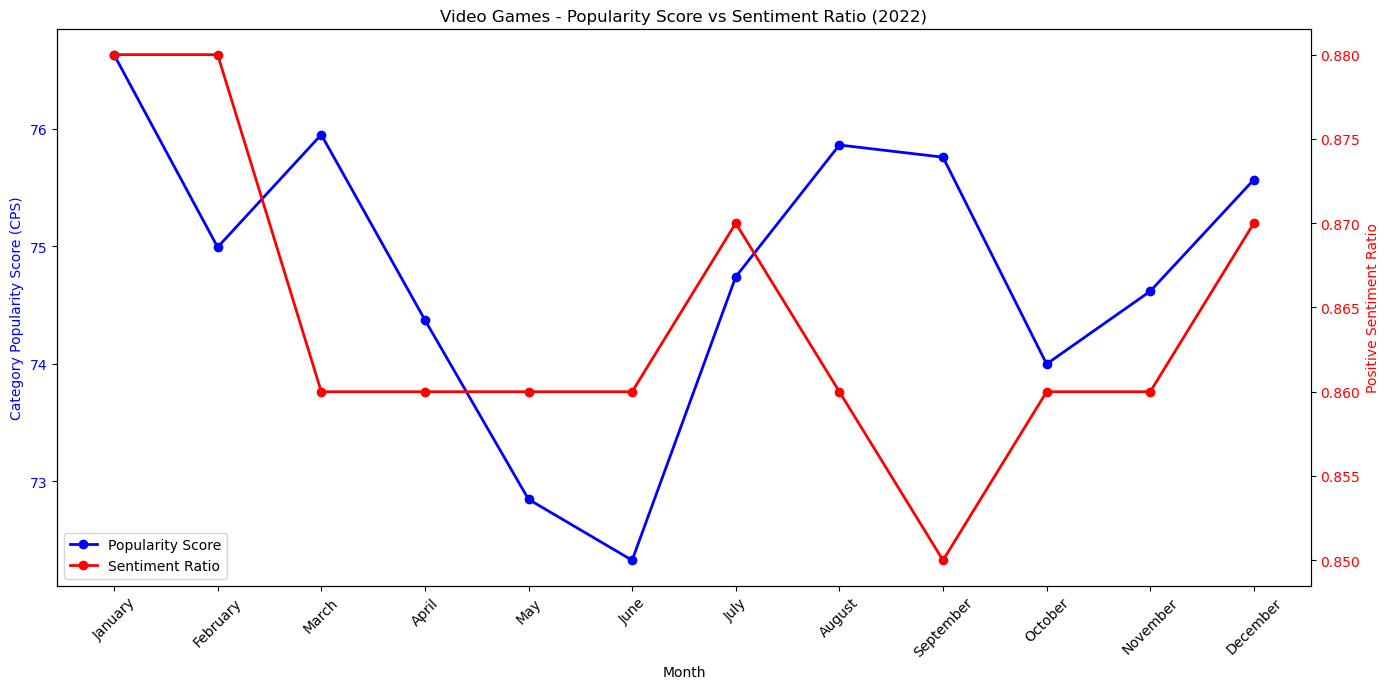

In [134]:
category_popularity_sentiment("Video Games", 2022)

In [131]:
def brand_popularity_sentiment(category_name):
    # Get brand-level popularity scores
    brand_popularity = bpcps_summary[bpcps_summary['category'] == category_name].groupby('brand')['BPCPS scaled'].mean()
    
    # Get brand sentiment data
    brand_data = final_predictions[final_predictions['category'] == category_name]
    brand_sentiment = brand_data.groupby('brand').agg(
        sentiment_ratio=('predictedSentiment', 'mean'),
        review_count=('predictedSentiment', 'count')
    )
    
    # Merge the data
    combined_data = pd.merge(
        brand_popularity.reset_index(),
        brand_sentiment.reset_index(),
        on='brand'
    )
    
    # Filter for brands with sufficient reviews
    min_reviews = 10
    filtered_data = combined_data[combined_data['review_count'] >= min_reviews]
    
    # Sort brands by popularity for better visualization
    sorted_data = filtered_data.sort_values('BPCPS scaled', ascending=False).head(15)  # Top 15 brands
    
    # Create figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx()
    
    # Plot popularity scores on left axis
    line1 = ax1.plot(sorted_data['brand'], sorted_data['BPCPS scaled'], 'b-o', linewidth=2, label='Popularity Score')
    ax1.set_xlabel('Brand')
    ax1.set_ylabel('Brand Popularity Score (BPCPS)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Plot sentiment ratios on right axis
    line2 = ax2.plot(sorted_data['brand'], sorted_data['sentiment_ratio'], 'r-o', linewidth=2, label='Sentiment Ratio')
    ax2.set_ylabel('Positive Sentiment Ratio', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Set x-axis brand labels and rotate them
    plt.xticks(rotation=45, ha='right')
    
    # Add combined legend
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='lower left')
    
    plt.title(f'Brand Popularity vs. Sentiment Ratio in {category_name}')   
    plt.tight_layout()
    plt.grid(False)
    plt.show()

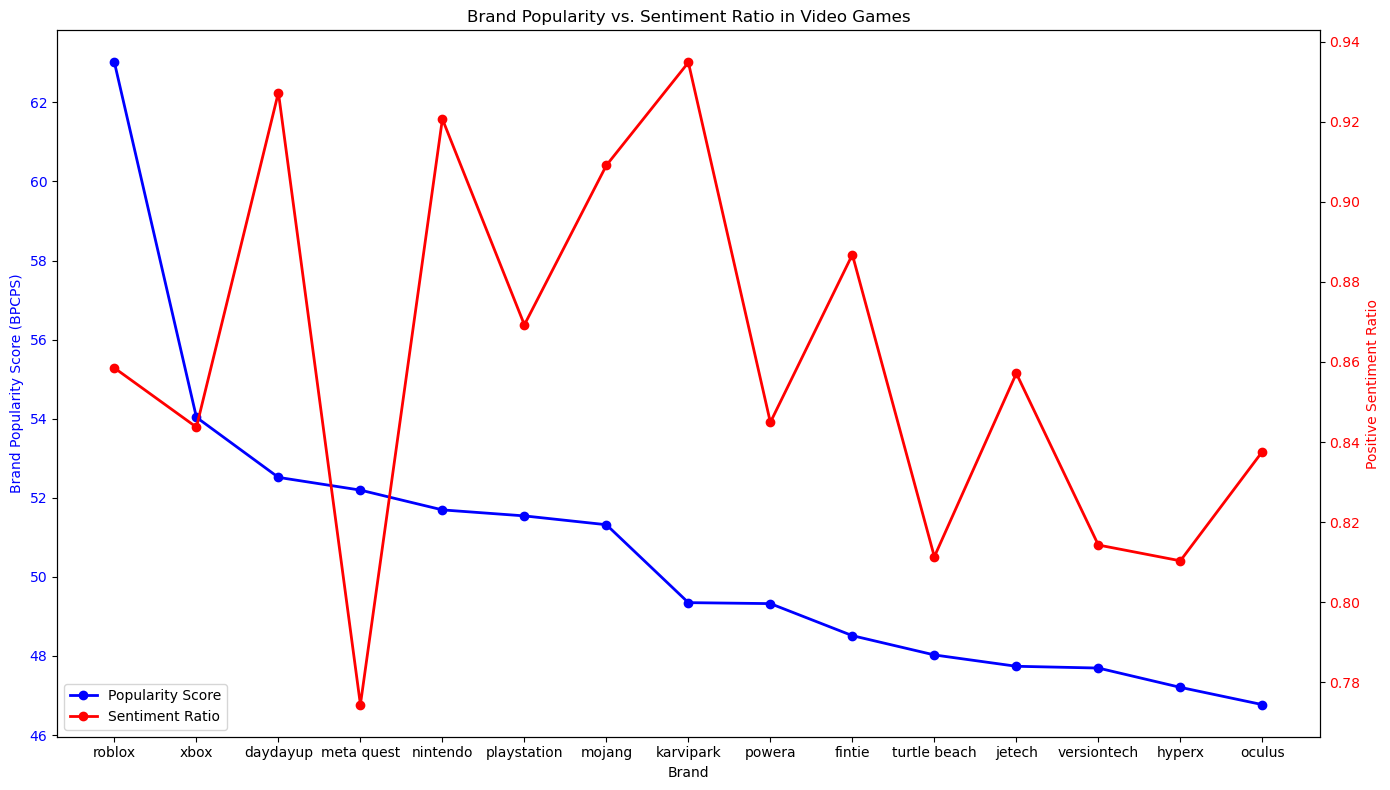

In [132]:
brand_popularity_sentiment("Video Games")

In [ ]:
def brand_popularity_sentiment_single_year(category_name, brand_name, year=None):
    # Filter data for the specified category and brand
    brand_popularity_data = bpcps_summary[(bpcps_summary['category'] == category_name) & 
                                         (bpcps_summary['brand'] == brand_name)]
    
    # Apply year filter if specified
    if year is not None:
        brand_popularity_data = brand_popularity_data[brand_popularity_data['year'] == year]
    
    # Get sentiment data from brandTotal
    brand_sentiment_data = brandTotal[(brandTotal['category'] == category_name) & 
                                     (brandTotal['brand'] == brand_name)]
    
    # Check if we have data for this brand
    if len(brand_popularity_data) == 0 or len(brand_sentiment_data) == 0:
        print(f"No data available for {brand_name} in {category_name} category.")
        return
    
    # Create date column for popularity data and sort by it
    brand_popularity_data['date'] = pd.to_datetime(brand_popularity_data[['year', 'month']].assign(day=1))
    brand_popularity_data = brand_popularity_data.sort_values('date')
    
    # Get monthly sentiment ratios
    monthly_sentiment = brand_sentiment_data.pivot(index='month', columns='brand', values='ratio').fillna(0)
    
    # Create the plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax2 = ax1.twinx()
    
    # Plot brand popularity trend on left axis (blue)
    line1 = ax1.plot(brand_popularity_data['month'], brand_popularity_data['BPCPS scaled'], 
                     'b-o', linewidth=2, markersize=8, label='Brand Popularity')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Brand Popularity Score (BPCPS)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Plot sentiment ratio on right axis (red)
    if not monthly_sentiment.empty:
        line2 = ax2.plot(monthly_sentiment.index, monthly_sentiment[brand_name], 
                         'r-o', linewidth=2, markersize=8, label='Sentiment Ratio')
        ax2.set_ylabel('Positive Sentiment Ratio', color='r')
        ax2.tick_params(axis='y', labelcolor='r')
        
        # Set sentiment ratio y-axis to 0-1 range
        ax2.set_ylim([0, 1])
    
    # Set x-axis to show month names
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(month_names, rotation=45)
    
    # Add combined legend
    lines = line1
    labels = [l.get_label() for l in line1]
    if not monthly_sentiment.empty:
        lines += line2
        labels += [l.get_label() for l in line2]
    ax1.legend(lines, labels, loc='lower left')
    
    # Add title with year if specified
    year_str = f" in {year}" if year else ""
    plt.title(f"Brand Popularity & Sentiment for '{brand_name}' in {category_name}{year_str}", fontsize=15)
    
    # Calculate and show correlation if we have both metrics
    if not monthly_sentiment.empty and not brand_popularity_data.empty:
        common_months = set(brand_popularity_data['month']).intersection(set(monthly_sentiment.index))
        if len(common_months) > 1:
            popularity_values = brand_popularity_data.set_index('month').loc[list(common_months), 'BPCPS scaled']
            sentiment_values = monthly_sentiment.loc[list(common_months), brand_name]
            correlation = popularity_values.corr(sentiment_values)
            plt.figtext(0.01, 0.01, f"Correlation: {correlation:.3f}", fontsize=12)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

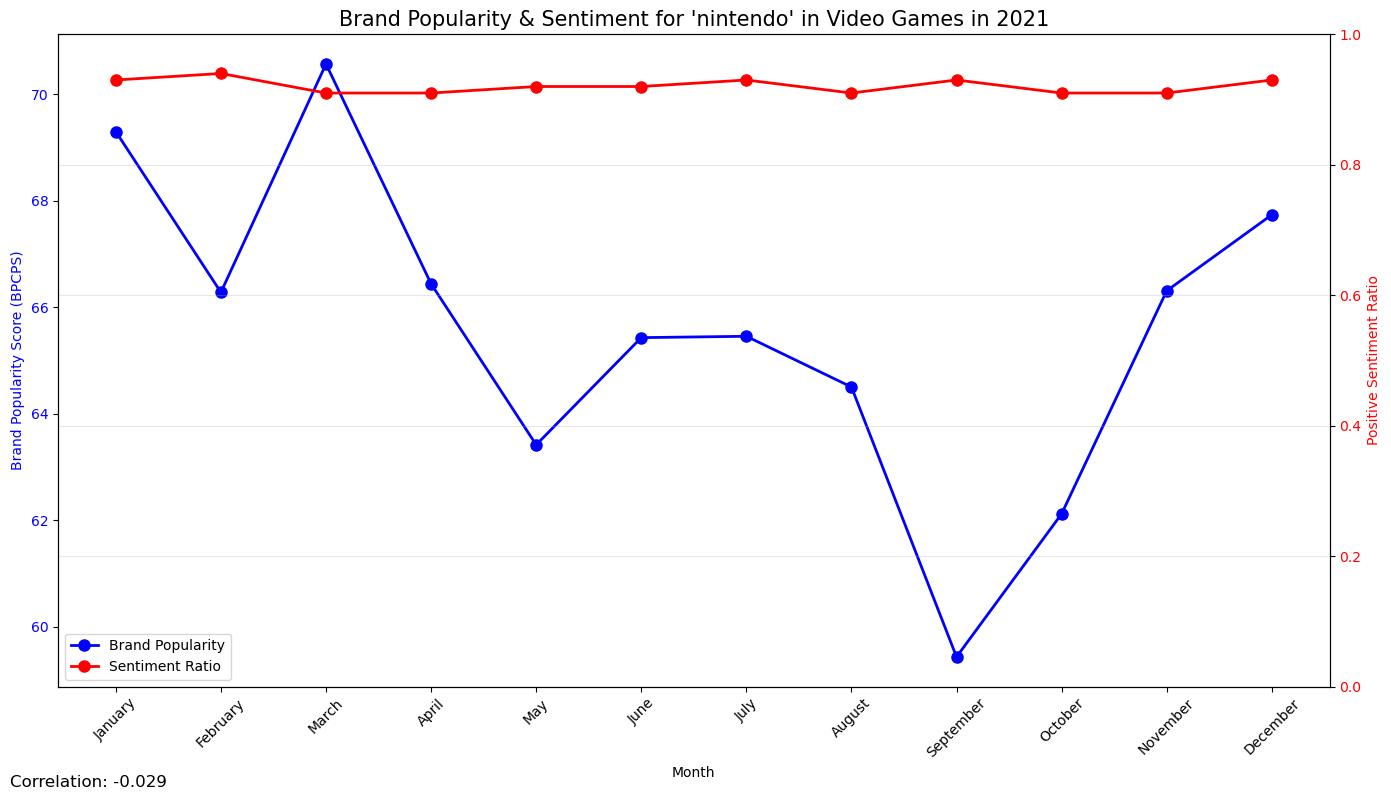

In [ ]:
brand_popularity_sentiment_single_year("Video Games", "nintendo", 2021)

In [ ]:
def brand_popularity_sentiment_multiple_years(category_name, brand_name, years=None):
    # Filter data for the specified category and brand
    brand_popularity_data = bpcps_summary[(bpcps_summary['category'] == category_name) & 
                                         (bpcps_summary['brand'] == brand_name)]
    
    # Apply years filter if specified
    if years is not None:
        brand_popularity_data = brand_popularity_data[brand_popularity_data['year'].isin(years)]
    
    # Check if we have data
    if len(brand_popularity_data) == 0:
        print(f"No data available for {brand_name} in {category_name} category.")
        return
    
    # Create date column and sort by it
    brand_popularity_data['date'] = pd.to_datetime(brand_popularity_data[['year', 'month']].assign(day=1))
    brand_popularity_data = brand_popularity_data.sort_values('date')
    
    # Get unique years in the data
    available_years = sorted(brand_popularity_data['year'].unique())
    
    # Create subplot grid - one row per year, but only one column now that we're combining metrics
    fig, axes = plt.subplots(len(available_years), 1, figsize=(14, 5*len(available_years)))
    
    # If only one year, wrap axes in a list so indexing works consistently
    if len(available_years) == 1:
        axes = np.array([axes])
    
    # Plot each year's data with combined metrics
    for i, year in enumerate(available_years):
        year_data = brand_popularity_data[brand_popularity_data['year'] == year]
        
        # Create twin axes for the current subplot
        ax1 = axes[i]
        ax2 = ax1.twinx()
        
        # Plot popularity on left axis (blue)
        line1 = ax1.plot(year_data['month'], year_data['BPCPS scaled'], 
                         'b-o', linewidth=2, markersize=8, label='Brand Popularity')
        ax1.set_ylabel('Brand Popularity Score (BPCPS)', color='b')
        ax1.tick_params(axis='y', labelcolor='b')
        
        # Get sentiment data for this year and brand
        brand_sentiment = brandTotal[(brandTotal['category'] == category_name) & 
                                    (brandTotal['brand'] == brand_name)]
        
        # Plot sentiment ratio on right axis (red)
        if not brand_sentiment.empty:
            monthly_sentiment = brand_sentiment.pivot(index='month', columns='brand', values='ratio').fillna(0)
            if not monthly_sentiment.empty and brand_name in monthly_sentiment.columns:
                line2 = ax2.plot(monthly_sentiment.index, monthly_sentiment[brand_name], 
                                'r-o', linewidth=2, markersize=8, label='Sentiment Ratio')
                ax2.set_ylabel('Positive Sentiment Ratio', color='r')
                ax2.tick_params(axis='y', labelcolor='r')
                ax2.set_ylim([0, 1])
                
                # Add combined legend
                lines = line1 + line2
                labels = [l.get_label() for l in line1] + [l.get_label() for l in line2]
                ax1.legend(lines, labels, loc='lower left')
                
                # Calculate and display correlation
                common_months = set(year_data['month']).intersection(set(monthly_sentiment.index))
                if len(common_months) > 1:
                    popularity_values = year_data.set_index('month').loc[list(common_months), 'BPCPS scaled']
                    sentiment_values = monthly_sentiment.loc[list(common_months), brand_name]
        
        # Set x-axis to show month names
        ax1.set_xticks(range(1, 13))
        ax1.set_xticklabels([m[:3] for m in month_names], rotation=45)
        
        # Set title for this year's subplot
        ax1.set_title(f'{year}', fontsize=14)
        ax1.grid(True, alpha=0.3)
        
        # Add x-axis label only to the bottom subplot
        if i == len(available_years) - 1:
            ax1.set_xlabel('Month')
    
    plt.suptitle(f"Brand Popularity & Sentiment for '{brand_name}' in {category_name}", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.4)
    plt.show()

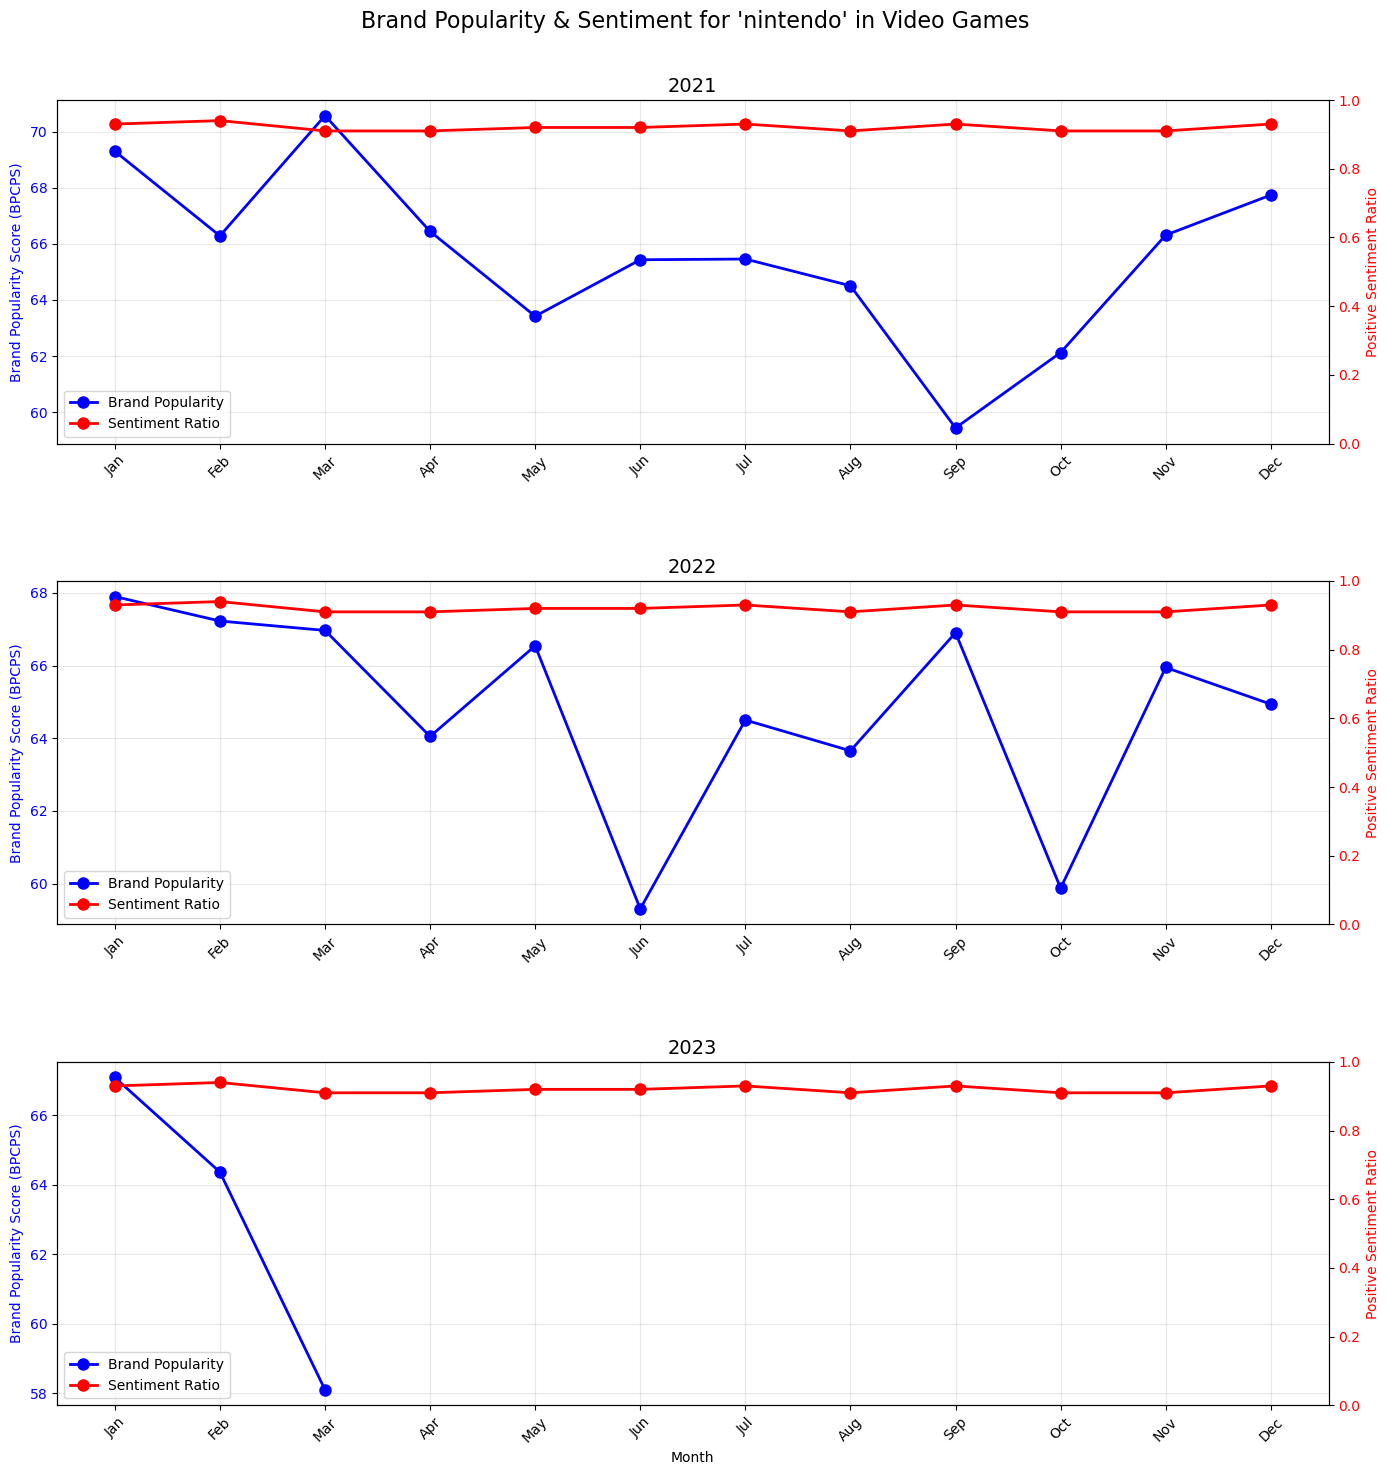

In [128]:
brand_popularity_sentiment_multiple_years("Video Games", "nintendo", years=[2021, 2022, 2023])